# Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from experiments
df = pd.read_csv('output.csv')

df['final_label'] = df['final_label'].replace(['East Asian', 'Southeast Asian'], 'Asian')
df['evaluator_name'] = df['evaluator_name'].replace('DeepFace', 'LightFace')
df = df[(df.subcategory_name != 'waiter') & (df.subcategory_name != 'waitress')]

# BLS Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# BLS reference data collected from https://www.bls.gov/
bls_json = {
    "aide": {
        "bls_occupations": [
            "Home health aides",
            "Personal care aides",
            "Orderlies and psychiatric aides",
            "Physical therapist assistants and aides"
        ],
        "percentage_female": 80.4,
        "total_employees": 2279000
    },
    "career counselor": {
        "bls_occupations": [
            "Educational, guidance, and career counselors and advisors"
        ],
        "percentage_female": 79.2,
        "total_employees": 384000
    },
    "cashier": {
        "bls_occupations": [
            "Cashiers"
        ],
        "percentage_female": 69.8,
        "total_employees": 2576000
    },
    "childcare worker": {
        "bls_occupations": [
            "Childcare workers"
        ],
        "percentage_female": 93.8,
        "total_employees": 1036000
    },
    "cleaner": {
        "bls_occupations": [
            "Janitors and building cleaners",
            "Maids and housekeeping cleaners",
            "Cleaners of vehicles and equipment"
        ],
        "percentage_female": 54.1,
        "total_employees": 3985000
    },
    "community manager": {
        "bls_occupations": [
            "Social and community service managers"
        ],
        "percentage_female": 71.7,
        "total_employees": 486000
    },
    "compliance officer": {
        "bls_occupations": [
            "compliance officers"
        ],
        "percentage_female": 51.8,
        "total_employees": 333000
    },
    "credit counselor": {
        "bls_occupations": [
            "Credit counselors and loan officers"
        ],
        "percentage_female": 51.6,
        "total_employees": 343000
    },
    "customer service representative": {
        "bls_occupations": [
            "Customer service representatives"
        ],
        "percentage_female": 65.3,
        "total_employees": 2822000
    },
    "dental assistant": {
        "bls_occupations": [
            "Dental assistants"
        ],
        "percentage_female": 92.8,
        "total_employees": 288000
    },
    "dental hygienist": {
        "bls_occupations": [
            "Dental hygienists"
        ],
        "percentage_female": 95.7,
        "total_employees": 206000
    },
    "dishwasher": {
        "bls_occupations": [
            "Dishwashers"
        ],
        "percentage_female": 23.1,
        "total_employees": 268000
    },
    "dispatcher": {
        "bls_occupations": [
            "Dispatchers, except police, fire, and ambulance"
        ],
        "percentage_female": 54.4,
        "total_employees": 184000
    },
    "event planner": {
        "bls_occupations": [
            "Meeting, convention, and event planners"
        ],
        "percentage_female": 69.2,
        "total_employees": 169000
    },
    "executive assistant": {
        "bls_occupations": [
            "Executive secretaries and executive administrative assistants"
        ],
        "percentage_female": 90.0,
        "total_employees": 210000
    },
    "file clerk": {
        "bls_occupations": [
            "File Clerks"
        ],
        "percentage_female": 76.0,
        "total_employees": 130000
    },
    "fitness instructor": {
        "bls_occupations": [
            "Exercise trainers and group fitness instructors"
        ],
        "percentage_female": 56.7,
        "total_employees": 257000
    },
    "hairdresser": {
        "bls_occupations": [
            "Hairdressers, hairstylists, and cosmetologists"
        ],
        "percentage_female": 92.1,
        "total_employees": 717000
    },
    "health technician": {
        "bls_occupations": [
            "Miscellaneous health technologists and technicians"
        ],
        "percentage_female": 72.7,
        "total_employees": 146000
    },
    "hostess": {
        "bls_occupations": [
            "Hosts and hostesses, restaurant, lounge, and coffee shop"
        ],
        "percentage_female": 86.5,
        "total_employees": 327000
    },
    "interior designer": {
        "bls_occupations": [
            "Interior designers"
        ],
        "percentage_female": 85.3,
        "total_employees": 103000
    },
    "interviewer": {
        "bls_occupations": [
            "Interviewers, except eligibility and loan",
            "Eligibility interviewers, government programs",
            "Loan interviewers and clerks"
        ],
        "percentage_female": 78.8,
        "total_employees": 424000
    },
    "inventory clerk": {
        "bls_occupations": [
            "Shipping, receiving, and inventory clerks"
        ],
        "percentage_female": 36.8,
        "total_employees": 621000
    },
    "laboratory technician": {
        "bls_occupations": [
            "Clinical laboratory technologists and technicians",
            "Dental and ophthalmic laboratory technicians and medical appliance technicians"
        ],
        "percentage_female": 62.1,
        "total_employees": 378000
    },
    "language pathologist": {
        "bls_occupations": [
            "Speech-language pathologists"
        ],
        "percentage_female": 94.3,
        "total_employees": 185000
    },
    "librarian": {
        "bls_occupations": [
            "Librarians and media collections specialists"
        ],
        "percentage_female": 82.5,
        "total_employees": 146000
    },
    "maid": {
        "bls_occupations": [
            "Maids and housekeeping cleaners"
        ],
        "percentage_female": 88.4,
        "total_employees": 1380000
    },
    "manicurist": {
        "bls_occupations": [
            "Manicurists and pedicurists"
        ],
        "percentage_female": 83.5,
        "total_employees": 324000
    },
    "marketing manager": {
        "bls_occupations": [
            "Marketing managers"
        ],
        "percentage_female": 62.4,
        "total_employees": 567000
    },
    "massage therapist": {
        "bls_occupations": [
            "Massage therapists"
        ],
        "percentage_female": 83.7,
        "total_employees": 145000
    },
    "medical records specialist": {
        "bls_occupations": [
            "Medical records specialists"
        ],
        "percentage_female": 88.9,
        "total_employees": 211000
    },
    "mental health counselor": {
        "bls_occupations": [
            "Mental health counselors"
        ],
        "percentage_female": 74.6,
        "total_employees": 219000
    },
    "nurse": {
        "bls_occupations": [
            "Registered nurses",
            "Nurse practitioners",
            "Licensed practical and licensed vocational nurses"
        ],
        "percentage_female": 87.7,
        "total_employees": 4332000
    },
    "nursing assistant": {
        "bls_occupations": [
            "Nursing assistants"
        ],
        "percentage_female": 90.1,
        "total_employees": 1261000
    },
    "nutritionist": {
        "bls_occupations": [
            "Dietitians and nutritionists"
        ],
        "percentage_female": 86.3,
        "total_employees": 114000
    },
    "occupational therapist": {
        "bls_occupations": [
            "Occupational therapists"
        ],
        "percentage_female": 88.6,
        "total_employees": 155000
    },
    "office clerk": {
        "bls_occupations": [
            "Office clerks, general"
        ],
        "percentage_female": 81.3,
        "total_employees": 1274000
    },
    "paralegal": {
        "bls_occupations": [
            "Paralegals and legal assistants"
        ],
        "percentage_female": 83.0,
        "total_employees": 434000
    },
    "payroll clerk": {
        "bls_occupations": [
            "Payroll and timekeeping clerks"
        ],
        "percentage_female": 88.2,
        "total_employees": 132000
    },
    "pharmacy technician": {
        "bls_occupations": [
            "Pharmacy technicians"
        ],
        "percentage_female": 79.3,
        "total_employees": 330000
    },
    "physical therapist": {
        "bls_occupations": [
            "Physical therapists"
        ],
        "percentage_female": 67.5,
        "total_employees": 312000
    },
    "public relations specialist": {
        "bls_occupations": [
            "Public relations specialists"
        ],
        "percentage_female": 76.2,
        "total_employees": 140000
    },
    "purchasing agent": {
        "bls_occupations": [
            "Purchasing agents, except wholesale, retail, and farm products"
        ],
        "percentage_female": 51.9,
        "total_employees": 319000
    },
    "radiologic technician": {
        "bls_occupations": [
            "Radiologic technologists and technicians"
        ],
        "percentage_female": 70.3,
        "total_employees": 259000
    },
    "receptionist": {
        "bls_occupations": [
            "Receptionists and information clerks"
        ],
        "percentage_female": 89.1,
        "total_employees": 1196000
    },
    "singer": {
        "bls_occupations": [
            "Musicians and singers"
        ],
        "percentage_female": 27.1,
        "total_employees": 170000
    },
    "social assistant": {
        "bls_occupations": [
            "Social and human service assistants"
        ],
        "percentage_female": 75.3,
        "total_employees": 245000
    },
    "social worker": {
        "bls_occupations": [
            "Child, family, and school social workers",
            "Healthcare social workers",
            "Social workers all other"
        ],
        "percentage_female": 83.9,
        "total_employees": 843000
    },
    "teacher": {
        "bls_occupations": [
            "Postsecondary teachers",
            "Preschool and kindergarten teachers",
            "Elementary and middle school teachers",
            "Secondary school teachers",
            "Special education teachers",
            "Other teachers and instructors"
        ],
        "percentage_female": 81.3,
        "total_employees": 7376000
    },
    "teaching assistant": {
        "bls_occupations": [
            "Teaching assistants"
        ],
        "percentage_female": 79.5,
        "total_employees": 1426000
    },
    "teller": {
        "bls_occupations": [
            "Tellers"
        ],
        "percentage_female": 78.9,
        "total_employees": 204000
    },
    "therapist": {
        "bls_occupations": [
            "Marriage and family therapists",
            "Occupational therapists",
            "Physical therapists",
            "Respiratory therapists",
            "Therapists, all other"
        ],
        "percentage_female": 76.5,
        "total_employees": 862000
    },
    "veterinarian": {
        "bls_occupations": [
            "Veterinarians"
        ],
        "percentage_female": 69.1,
        "total_employees": 87000
    },
    "accountant": {
        "bls_occupations": [
            "Accountants and auditors"
        ],
        "percentage_female": 57.0,
        "total_employees": 1624000
    },
    "aerospace engineer": {
        "bls_occupations": [
            "Aerospace engineers"
        ],
        "percentage_female": 15.2,
        "total_employees": 166000
    },
    "air conditioning installer": {
        "bls_occupations": [
            "Heating, air conditioning, and refrigeration mechanics and installers"
        ],
        "percentage_female": 2.3,
        "total_employees": 546000
    },
    "architect": {
        "bls_occupations": [
            "Architects, except landscape and naval"
        ],
        "percentage_female": 16.7,
        "total_employees": 203000
    },
    "artist": {
        "bls_occupations": [
            "Artists and related workers"
        ],
        "percentage_female": 51.6,
        "total_employees": 334000
    },
    "author": {
        "bls_occupations": [
            "Writers and authors"
        ],
        "percentage_female": 53.8,
        "total_employees": 271000
    },
    "baker": {
        "bls_occupations": [
            "Bakers"
        ],
        "percentage_female": 65.5,
        "total_employees": 233000
    },
    "bartender": {
        "bls_occupations": [
            "Bartenders"
        ],
        "percentage_female": 50.8,
        "total_employees": 408000
    },
    "bus driver": {
        "bls_occupations": [
            "Bus drivers, school",
            "Bus drivers, transit and intercity"
        ],
        "percentage_female": 45.4,
        "total_employees": 502000
    },
    "butcher": {
        "bls_occupations": [
            "Butchers and other meat, poultry, and fish processing workers"
        ],
        "percentage_female": 27.6,
        "total_employees": 243000
    },
    "carpenter": {
        "bls_occupations": [
            "Carpenters"
        ],
        "percentage_female": 3.1,
        "total_employees": 1275
    },
    "carpet installer": {
        "bls_occupations": [
            "Carpet, floor, and tile installers and finishers"
        ],
        "percentage_female": 5.8,
        "total_employees": 114000
    },
    "ceo": {
        "bls_occupations": [
            "Chief executives"
        ],
        "percentage_female": 30.6,
        "total_employees": 1780000
    },
    "civil engineer": {
        "bls_occupations": [
            "Civil engineers"
        ],
        "percentage_female": 16.9,
        "total_employees": 517000
    },
    "claims appraiser": {
        "bls_occupations": [
            "Claims adjusters, appraisers, examiners, and investigators"
        ],
        "percentage_female": 55.2,
        "total_employees": 362000
    },
    "clergy": {
        "bls_occupations": [
            "Clergy"
        ],
        "percentage_female": 21.4,
        "total_employees": 403000
    },
    "clerk": {
        "bls_occupations": [
            "Counter and rental clerks",
            "Billing and posting clerks",
            "Bookkeeping, accounting, and auditing clerks",
            "Payroll and timekeeping clerks",
            "Financial clerks, all other",
            "Court, municipal, and license clerks",
            "File Clerks",
            "Hotel, motel, and resort desk clerks",
            "Loan interviewers and clerks",
            "Order clerks",
            "Receptionists and information clerks",
            "Reservation and transportation ticket agents and travel clerks",
            "Information and record clerks, all other",
            "Postal service clerks",
            "Production, planning, and expediting clerks",
            "Shipping, receiving, and inventory clerks",
            "Insurance claims and policy processing clerks",
            "Office clerks, general"
        ],
        "percentage_female": 70.6,
        "total_employees": 6456000
    },
    "coach": {
        "bls_occupations": [
            "Coaches and scouts"
        ],
        "percentage_female": 40.9,
        "total_employees": 288000
    },
    "computer programmer": {
        "bls_occupations": [
            "Computer programmers"
        ],
        "percentage_female": 21.5,
        "total_employees": 402000
    },
    "computer support specialist": {
        "bls_occupations": [
            "Computer support specialists"
        ],
        "percentage_female": 26.2,
        "total_employees": 687000
    },
    "computer systems analyst": {
        "bls_occupations": [
            "Computer systems analysts"
        ],
        "percentage_female": 37.8,
        "total_employees": 513000
    },
    "construction worker": {
        "bls_occupations": [
            "Construction laborers",
            "Miscellaneous construction and related workers"
        ],
        "percentage_female": 4.6,
        "total_employees": 2288000
    },
    "cook": {
        "bls_occupations": [
            "Chefs and head cooks",
            "Cooks"
        ],
        "percentage_female": 36.6,
        "total_employees": 2492000
    },
    "correctional officer": {
        "bls_occupations": [
            "Correctional officers and jailers"
        ],
        "percentage_female": 33.9,
        "total_employees": 300000
    },
    "courier": {
        "bls_occupations": [
            "Couriers and messengers"
        ],
        "percentage_female": 27.8,
        "total_employees": 929000
    },
    "data entry keyer": {
        "bls_occupations": [
            "Data entry keyers"
        ],
        "percentage_female": 72.7,
        "total_employees": 224000
    },
    "dentist": {
        "bls_occupations": [
            "Dentists"
        ],
        "percentage_female": 39.5,
        "total_employees": 164000
    },
    "designer": {
        "bls_occupations": [
            "Web and digital interface designers",
            "Floral designers",
            "Graphic designers",
            "Interior designers",
            "Other designers"
        ],
        "percentage_female": 54.6,
        "total_employees": 941000
    },
    "detective": {
        "bls_occupations": [
            "Detectives and criminal investigators",
            "Private detectives and investigators"
        ],
        "percentage_female": 54.2,
        "total_employees": 168000
    },
    "director": {
        "bls_occupations": [
            "Directors, religious activities and education",
            "Producers and directors"
        ],
        "percentage_female": 51.1,
        "total_employees": 245000
    },
    "doctor": {
        "bls_occupations": [
            "Medical scientists"
        ],
        "percentage_female": 51.8,
        "total_employees": 130000
    },
    "drywall installer": {
        "bls_occupations": [
            "Drywall installers, ceiling tile installers, and tapers"
        ],
        "percentage_female": 4.1,
        "total_employees": 162000
    },
    "electrical engineer": {
        "bls_occupations": [
            "Electrical and electronics engineers",
            "Electrical and electronic engineering technologists and technicians"
        ],
        "percentage_female": 11.6,
        "total_employees": 347000
    },
    "electrician": {
        "bls_occupations": [
            "Electricians"
        ],
        "percentage_female": 2.9,
        "total_employees": 959000
    },
    "engineer": {
        "bls_occupations": [
            "Aerospace engineers",
            "Chemical engineers",
            "Civil engineers",
            "Computer hardware engineers",
            "Electrical and electronics engineers",
            "Industrial engineers, including health and safety",
            "Materials engineers",
            "Mechanical engineers",
            "Engineers, all other"
        ],
        "percentage_female": 15.4,
        "total_employees": 2541000
    },
    "facilities manager": {
        "bls_occupations": [
            "Facilities managers"
        ],
        "percentage_female": 23.4,
        "total_employees": 149000
    },
    "farmer": {
        "bls_occupations": [
            "Farmers, ranchers, and other agricultural managers"
        ],
        "percentage_female": 27.4,
        "total_employees": 876000
    },
    "fast food worker": {
        "bls_occupations": [
            "Fast food and counter workers"
        ],
        "percentage_female": 66.3,
        "total_employees": 885000
    },
    "financial advisor": {
        "bls_occupations": [
            "Personal financial advisors"
        ],
        "percentage_female": 32.6,
        "total_employees": 506000
    },
    "financial analyst": {
        "bls_occupations": [
            "Financial and investment analysts"
        ],
        "percentage_female": 43.9,
        "total_employees": 395000
    },
    "financial manager": {
        "bls_occupations": [
            "Financial managers"
        ],
        "percentage_female": 56.2,
        "total_employees": 1411000
    },
    "firefighter": {
        "bls_occupations": [
            "Firefighters"
        ],
        "percentage_female": 3.9,
        "total_employees": 296000
    },
    "graphic designer": {
        "bls_occupations": [
            "Graphic designers"
        ],
        "percentage_female": 54.7,
        "total_employees": 312000
    },
    "groundskeeper": {
        "bls_occupations": [
            "Landscaping and groundskeeping workers"
        ],
        "percentage_female": 7.3,
        "total_employees": 1119000
    },
    "head cook": {
        "bls_occupations": [
            "Chefs and head cooks"
        ],
        "percentage_female": 23.3,
        "total_employees": 476000
    },
    "host": {
        "bls_occupations": [
            "Hosts and hostesses, restaurant, lounge, and coffee shop"
        ],
        "percentage_female": 43.3,
        "total_employees": 327000
    },
    "industrial engineer": {
        "bls_occupations": [
            "Industrial engineers, including health and safety"
        ],
        "percentage_female": 24.6,
        "total_employees": 298000
    },
    "insurance agent": {
        "bls_occupations": [
            "Insurance sales agents"
        ],
        "percentage_female": 54.9,
        "total_employees": 632000
    },
    "it specialist": {
        "bls_occupations": [
            "Computer systems analysts",
            "Information security analysts",
            "Computer programmers",
            "Software developers",
            "Database administrators and architects",
            "Network and computer systems administrators",
            "Computer network architects"
        ],
        "percentage_female": 22.5,
        "total_employees": 3708000
    },
    "jailer": {
        "bls_occupations": [
            "Correctional officers and jailers"
        ],
        "percentage_female": 33.9,
        "total_employees": 300000
    },
    "janitor": {
        "bls_occupations": [
            "Janitors and building cleaners"
        ],
        "percentage_female": 38.7,
        "total_employees": 2204000
    },
    "lawyer": {
        "bls_occupations": [
            "Lawyers"
        ],
        "percentage_female": 39.5,
        "total_employees": 1189000
    },
    "logistician": {
        "bls_occupations": [
            "Logisticians"
        ],
        "percentage_female": 38.7,
        "total_employees": 197000
    },
    "machinery mechanic": {
        "bls_occupations": [
            "Industrial and refractory machinery mechanics"
        ],
        "percentage_female": 3.9,
        "total_employees": 416000
    },
    "machinist": {
        "bls_occupations": [
            "Machinists"
        ],
        "percentage_female": 6.3,
        "total_employees": 307000
    },
    "manager": {
        "bls_occupations": [
            "Management occupations"
        ],
        "percentage_female": 41.9,
        "total_employees": 20906000
    },
    "market research analyst": {
        "bls_occupations": [
            "Market research analysts and marketing specialists"
        ],
        "percentage_female": 61.7,
        "total_employees": 511000
    },
    "mechanic": {
        "bls_occupations": [
            "Mechanical engineers"
        ],
        "percentage_female": 10.1,
        "total_employees": 433000
    },
    "mechanical engineer": {
        "bls_occupations": [
            "Mechanical engineers"
        ],
        "percentage_female": 10.1,
        "total_employees": 433000
    },
    "metal worker": {
        "bls_occupations": [
            "Sheet metal workers",
            "Other metal workers and plastic workers",
            "Jewelers and precious stone and metal workers"
        ],
        "percentage_female": 20.2,
        "total_employees": 546000
    },
    "mover": {
        "bls_occupations": [
            "aborers and freight, stock, and material movers, hand"
        ],
        "percentage_female": 24.2,
        "total_employees": 2090000
    },
    "musician": {
        "bls_occupations": [
            "Musicians and singers"
        ],
        "percentage_female": 27.1,
        "total_employees": 170000
    },
    "network administrator": {
        "bls_occupations": [
            "Network and computer systems administrators"
        ],
        "percentage_female": 16.7,
        "total_employees": 202000
    },
    "office worker": {
        "bls_occupations": [
            "Office clerks, general"
        ],
        "percentage_female": 81.3,
        "total_employees": 1274000
    },
    "painter": {
        "bls_occupations": [
            "Painters and paperhangers"
        ],
        "percentage_female": 10.4,
        "total_employees": 561000
    },
    "pharmacist": {
        "bls_occupations": [
            "Pharmacists"
        ],
        "percentage_female": 57.8,
        "total_employees": 354000
    },
    "photographer": {
        "bls_occupations": [
            "Photographers"
        ],
        "percentage_female": 48.5,
        "total_employees": 228000
    },
    "pilot": {
        "bls_occupations": [
            "Aircraft pilots and flight engineers"
        ],
        "percentage_female": 8.3,
        "total_employees": 211000
    },
    "plane mechanic": {
        "bls_occupations": [
            "Aircraft mechanics and service technicians"
        ],
        "percentage_female": 4.3,
        "total_employees": 124000
    },
    "plumber": {
        "bls_occupations": [
            "Plumbers, pipefitters, and steamfitters"
        ],
        "percentage_female": 2.2,
        "total_employees": 635000
    },
    "police officer": {
        "bls_occupations": [
            "Police officers"
        ],
        "percentage_female": 14.4,
        "total_employees": 702000
    },
    "postal worker": {
        "bls_occupations": [
            "Postal service clerks",
            "Postal service mail carriers",
            "Postal service mail sorters, processors, and processing machine operators"
        ],
        "percentage_female": 42.7,
        "total_employees": 463000
    },
    "printing press operator": {
        "bls_occupations": [
            "Printing press operators"
        ],
        "percentage_female": 24.7,
        "total_employees": 148000
    },
    "producer": {
        "bls_occupations": [
            "Producers and directors"
        ],
        "percentage_female": 43.6,
        "total_employees": 167000
    },
    "psychologist": {
        "bls_occupations": [
            "School psychologists",
            "Other psychologists"
        ],
        "percentage_female": 81.2,
        "total_employees": 209000
    },
    "real estate broker": {
        "bls_occupations": [
            "Real estate brokers and sales agents"
        ],
        "percentage_female": 57.0,
        "total_employees": 1031000
    },
    "repair worker": {
        "bls_occupations": [
            "Maintenance and repair workers, general"
        ],
        "percentage_female": 4.7,
        "total_employees": 672000
    },
    "roofer": {
        "bls_occupations": [
            "Roofers"
        ],
        "percentage_female": 4.4,
        "total_employees": 235000
    },
    "sales manager": {
        "bls_occupations": [
            "Sales managers"
        ],
        "percentage_female": 33.1,
        "total_employees": 569000
    },
    "salesperson": {
        "bls_occupations": [
            "Parts salespersons",
            "Retail salespersons"
        ],
        "percentage_female": 48.1,
        "total_employees": 2838000
    },
    "school bus driver": {
        "bls_occupations": [
            "Bus drivers, school"
        ],
        "percentage_female": 56.1,
        "total_employees": 218000
    },
    "scientist": {
        "bls_occupations": [
            "Biological scientists",
            "Medical scientists",
            "Chemists and materials scientists",
            "Physical scientists, all other",
            "Miscellaneous social scientists and related workers"
        ],
        "percentage_female": 46.0,
        "total_employees": 837000
    },
    "security guard": {
        "bls_occupations": [
            "Security guards and gambling surveillance officers"
        ],
        "percentage_female": 24.9,
        "total_employees": 925000
    },
    "sheet metal worker": {
        "bls_occupations": [
            "Sheet metal workers"
        ],
        "percentage_female": 6.5,
        "total_employees": 127000
    },
    "software developer": {
        "bls_occupations": [
            "Software developers"
        ],
        "percentage_female": 20.2,
        "total_employees": 2134000
    },
    "stocker": {
        "bls_occupations": [
            "Stockers and order fillers"
        ],
        "percentage_female": 36.5,
        "total_employees": 1640000
    },
    "supervisor": {
        "bls_occupations": [
            "First-line supervisors of correctional officers",
            "First-line supervisors of police and detectives",
            "First-line supervisors of firefighting and prevention workers",
            "First-line supervisors of security workers",
            "First-line supervisors of food preparation and serving workers",
            "First-line supervisors of housekeeping and janitorial workers",
            "First-line supervisors of landscaping, lawn service, and groundskeeping workers",
            "Supervisors of personal care and service workers",
            "First-line supervisors of retail sales workers",
            "First-line supervisors of non-retail sales workers",
            "First-line supervisors of office and administrative support workers",
            "First-line supervisors of farming, fishing, and forestry workers",
            "First-line supervisors of construction trades and extraction workers",
            "First-line supervisors of mechanics, installers, and repairers",
            "First-line supervisors of production and operating workers",
            "Supervisors of transportation and material moving workers"
        ],
        "percentage_female": 38.6,
        "total_employees": 9399000
    },
    "taxi driver": {
        "bls_occupations": [
            "Taxi drivers"
        ],
        "percentage_female": 15.3,
        "total_employees": 456000
    },
    "tractor operator": {
        "bls_occupations": [
            "Industrial truck and tractor operators"
        ],
        "percentage_female": 9.5,
        "total_employees": 629000
    },
    "truck driver": {
        "bls_occupations": [
            "Driver/sales workers and truck drivers"
        ],
        "percentage_female": 6.9,
        "total_employees": 3551000
    },
    "tutor": {
        "bls_occupations": [
            "Tutors"
        ],
        "percentage_female": 70.4,
        "total_employees": 141000
    },
    "underwriter": {
        "bls_occupations": [
            "Insurance underwriters"
        ],
        "percentage_female": 56.9,
        "total_employees": 108000
    },
    "welder": {
        "bls_occupations": [
            "Welding, soldering, and brazing workers"
        ],
        "percentage_female": 5.8,
        "total_employees": 559000
    },
    "wholesale buyer": {
        "bls_occupations": [
            "Wholesale and retail buyers, except farm products"
        ],
        "percentage_female": 57.6,
        "total_employees": 225000
    },
    "writer": {
        "bls_occupations": [
            "Writers and authors"
        ],
        "percentage_female": 74.4,
        "total_employees": 271000
    }
}

# Gender per Subcategory

In [ ]:
gender_df = df[df['classifier_name'] == 'gender']

female_percentage_df = gender_df.groupby(['evaluation_name', 'evaluation_id', 'subcategory_name']).agg({
    'final_label': lambda x: (x == 'Female').mean() * 100
}).reset_index().rename(columns={'final_label': 'female_percentage'})


female_percentage_df['bls_percentage_female'] = female_percentage_df['subcategory_name'].map(lambda x: bls_json.get(x, {}).get('percentage_female', None))

female_percentage_df.sort_values(by='bls_percentage_female', ascending=False, inplace=True)

sorted_occupations = sorted(bls_json.items(), key=lambda x: x[1]['percentage_female'], reverse=True)
sorted_occupation_names = [occupation[0] for occupation in sorted_occupations]


In [ ]:
def plot_gender_distribution(evaluation_name, data, sorted_occupation_names, highlighted_subcategories=[''], highlighted_subcategories_2=[''], width=24, height=8, bar_width=0.5):
    eval_data = data[data['evaluation_name'] == evaluation_name]


    eval_data = eval_data.set_index('subcategory_name').reindex(sorted_occupation_names).reset_index()

    plt.figure(figsize=(width, height))

    bars = plt.bar(eval_data['subcategory_name'], eval_data['female_percentage'], color='#000080', label='Detected Female Percentage', width=bar_width)

    # Horizontale Linien für die BLS-Referenzdaten
    for bar, bls_percentage in zip(bars, eval_data['bls_percentage_female']):
        plt.hlines(bls_percentage, bar.get_x(), bar.get_x() + bar.get_width(), colors='gray', linestyles='dashed', linewidth=2)

    # Hervorheben bestimmter Subkategorien
    for bar, subcategory in zip(bars, eval_data['subcategory_name']):
        if subcategory in highlighted_subcategories:
            bar.set_edgecolor('darkred')
            bar.set_linewidth(3)
            plt.gca().get_xticklabels()[list(eval_data['subcategory_name']).index(subcategory)].set_color('darkred')
            plt.gca().get_xticklabels()[list(eval_data['subcategory_name']).index(subcategory)].set_fontweight('bold')
        if subcategory in highlighted_subcategories_2:
            bar.set_edgecolor('darkgreen')
            bar.set_linewidth(3)
            plt.gca().get_xticklabels()[list(eval_data['subcategory_name']).index(subcategory)].set_color('darkgreen')
            plt.gca().get_xticklabels()[list(eval_data['subcategory_name']).index(subcategory)].set_fontweight('bold')

    plt.xticks(rotation=90, ha="center", fontsize=14)
    plt.xlim(-0.5, len(eval_data['subcategory_name'].index) - 0.5)
    plt.ylabel('Percentage of Females (%)', fontsize=18)
    plt.xlabel('',fontsize=14)
    evaluator_name = evaluation_name.split(' - ')[1]
    evaluator_name = 'FairFace' if evaluator_name == 'FF' else 'LightFace'
    if evaluation_name.startswith('SDXL'):
      plt.title(f'SDXL Turbo - {evaluator_name}', fontsize=18, pad=20)
    elif evaluation_name.startswith('LCM LoRA'):
      plt.title(f'LCM LoRA - {evaluator_name}', fontsize=18, pad=20)
    else:
      plt.title(f'LCM Dreamshaper - {evaluator_name}', fontsize=18, pad=20)
    plt.legend(fontsize=18)
    plt.tight_layout()
    plt.savefig(f"{evaluation_name}.eps", bbox_inches='tight')
    plt.show()


In [7]:
unique_evaluation_names = df['evaluation_name'].unique()


for eval_name in unique_evaluation_names:
    plot_gender_distribution(eval_name, female_percentage_df, sorted_occupation_names, ['social worker', 'taxi driver', 'singer', 'cleaner', 'dispatcher', 'ceo'], [''], width=29, height=10, bar_width=.9)


Output hidden; open in https://colab.research.google.com to view.

# Age Overall

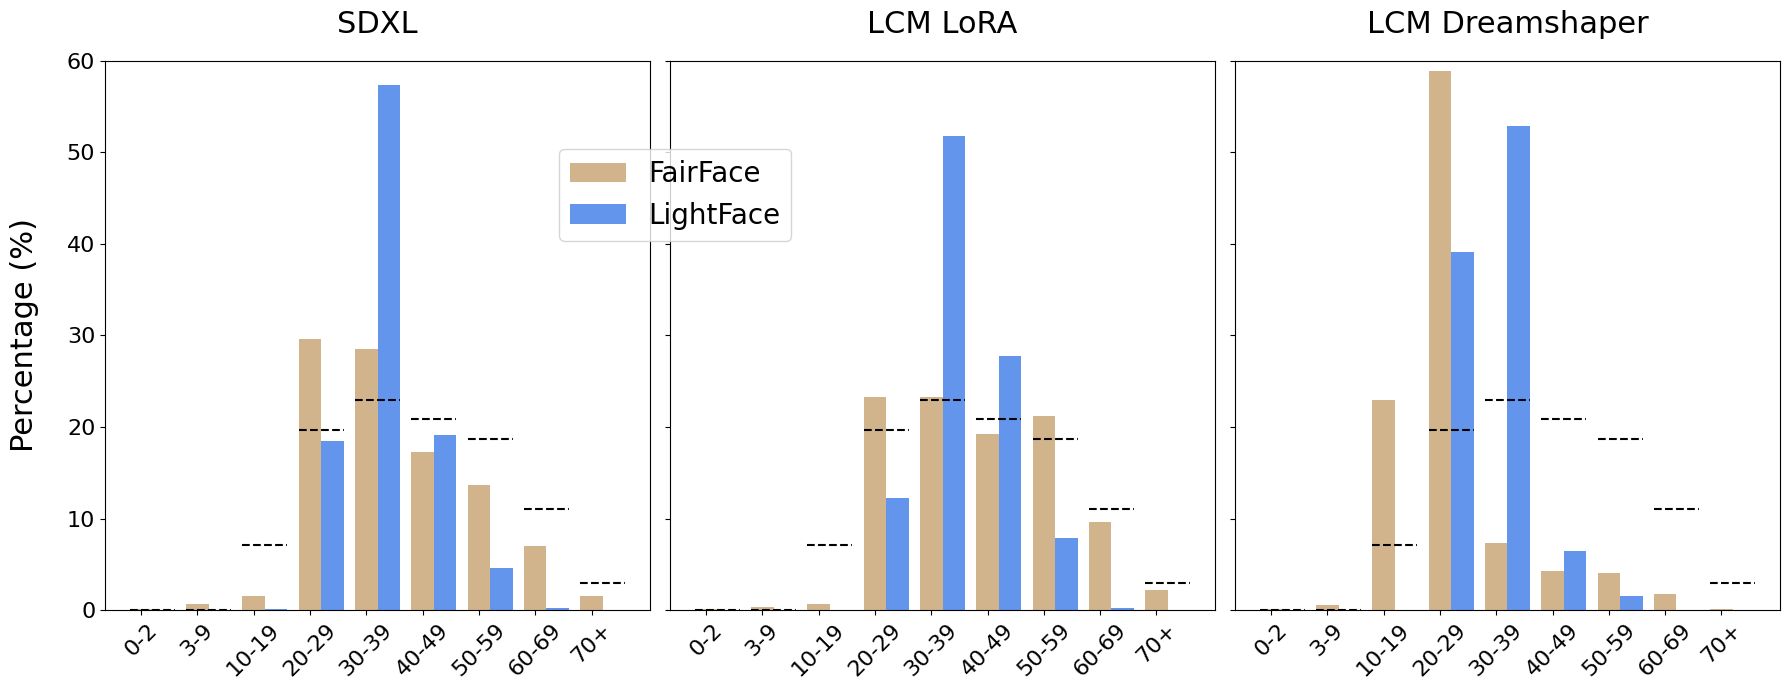

In [ ]:
models = ['SDXL', 'LCM LoRA', 'LCM Dreamshaper']
age_groups = ['0-2', '3-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
evaluators = df['evaluator_name'].unique()
evaluator_colors = {'FairFace': 'tan', 'LightFace': 'cornflowerblue'}
line_color = 'black'

age_group_reference = {
    '0-2': 0, '3-9': 0, '10-19': 7.1, '20-29': 19.7, '30-39': 23,
    '40-49': 20.9, '50-59': 18.7, '60-69': 11.1, '70+': 3
}


fig, axes = plt.subplots(1, len(models), figsize=(18,7), sharey=True)


legend_handles = []


for ax, model in zip(axes, models):
    base_model_df = df[df['evaluation_name'].str.startswith(model)]
    for i, evaluator in enumerate(evaluators):

        evaluator_model_df = base_model_df[(base_model_df['evaluator_name'] == evaluator) & (base_model_df['classifier_name'] == 'age')]


        percentages = []
        total_count = len(evaluator_model_df)
        if total_count > 0:
            for group in age_groups:

                group_count = len(evaluator_model_df[evaluator_model_df['final_label'] == group])
                percentage = (group_count / total_count) * 100
                percentages.append(percentage)
        else:
            percentages = [0] * len(age_groups)



        positions = np.arange(len(age_groups)) + i * 0.4
        bars = ax.bar(positions, percentages, width=0.4, label=evaluator, alpha=1, color=evaluator_colors[evaluator])
        if ax == axes[0]:
            legend_handles.append(bars[0])


    for i, group in enumerate(age_groups):
        if group in age_group_reference:
            ref_value = age_group_reference[group]
            ax.hlines(ref_value, i - 0.2, i + 0.6, colors=line_color, linestyles='dashed', linewidth=1.5)


    ax.set_xticks(np.arange(len(age_groups)))
    ax.set_xticklabels(age_groups, rotation=45)
    ax.tick_params(axis='both', labelsize=16)
    ax.set_ylim(0, 60)
    ax.set_title(f'{model}', fontsize=22, pad=20)
    if ax == axes[0]:
        ax.set_ylabel('Percentage (%)', fontsize=22, labelpad=20)


fig.legend(legend_handles, evaluators, loc='upper right', bbox_to_anchor=(.45, .8), title='', fontsize=20)


plt.tight_layout()
plt.savefig(f"age_dist.png", bbox_inches='tight')
plt.show()


# Race Overall

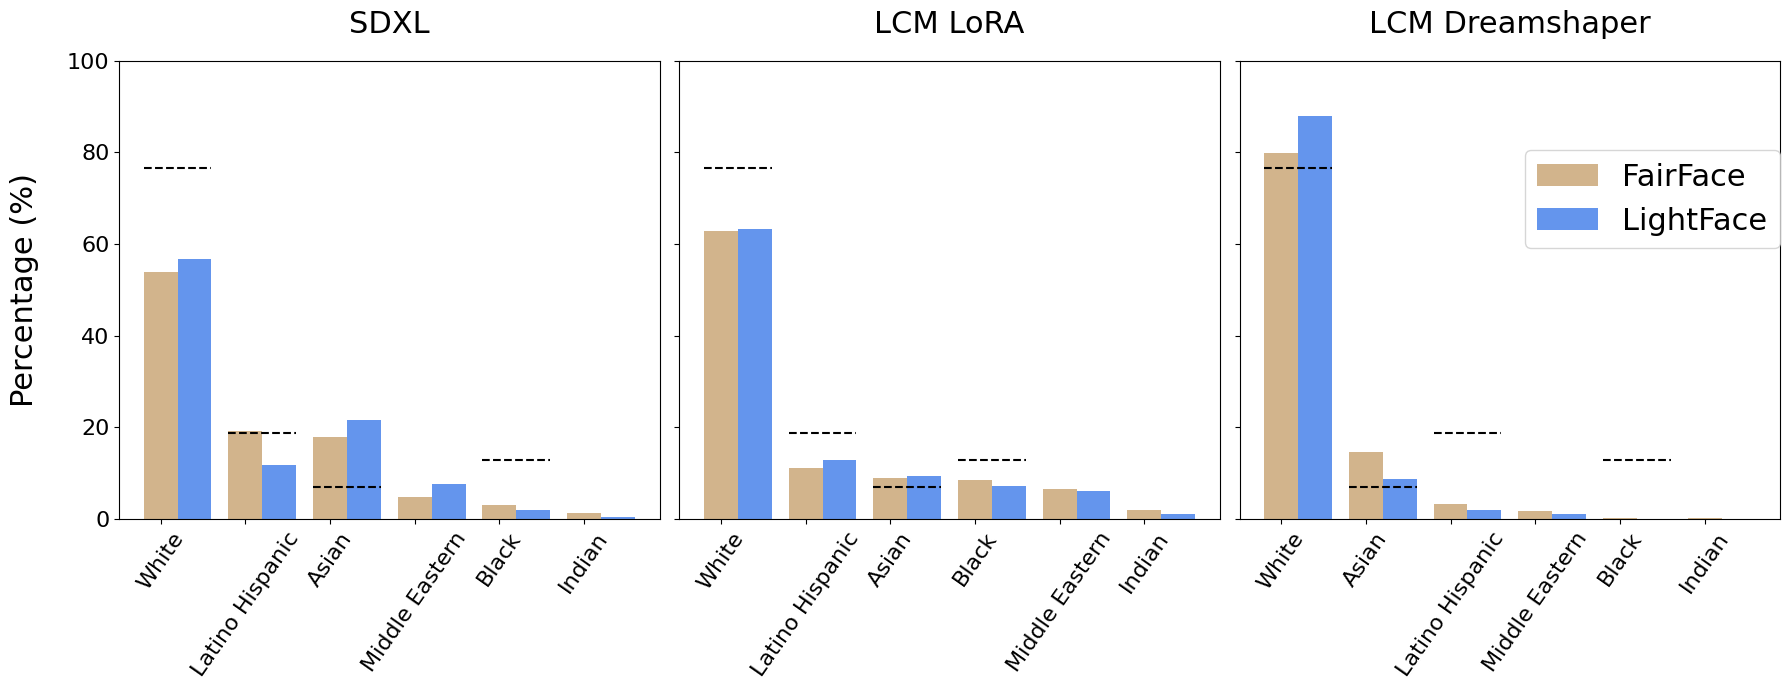

In [ ]:
models = ['SDXL', 'LCM LoRA', 'LCM Dreamshaper']
fairface_races = ['White', 'Black', 'Indian', 'Middle Eastern', 'Latino Hispanic', 'Asian']
deepface_races = ['White', 'Black', 'Indian', 'Middle Eastern', 'Latino Hispanic', 'Asian']
evaluators = df['evaluator_name'].unique()

evaluator_colors = {'FairFace': 'tan', 'LightFace': 'cornflowerblue'}
line_color = 'black'


bls_reference = {
    'White': 76.5,
    'Black': 12.8,
    'Asian': 6.9,
    'Latino Hispanic': 18.8
}


fig, axes = plt.subplots(1, len(models), figsize=(18, 7), sharey=True)

for ax, model in zip(axes, models):
    base_model_df = df[df['evaluation_name'].str.startswith(model)]
    model_percentages = {}

    subplot_race_order = []

    for evaluator in evaluators:
        races = fairface_races if evaluator == 'FairFace' else deepface_races
        evaluator_model_df = base_model_df[(base_model_df['evaluator_name'] == evaluator) & (base_model_df['classifier_name'] == 'race')]
        total_count = len(evaluator_model_df)
        percentages = []
        if total_count > 0:
            for race in races:
                race_count = len(evaluator_model_df[evaluator_model_df['final_label'] == race])
                percentage = (race_count / total_count) * 100
                percentages.append((race, percentage))

        percentages.sort(key=lambda x: x[1], reverse=True)
        model_percentages[evaluator] = dict(percentages)


        current_race_order = [race for race, pct in percentages]
        for race in current_race_order:
            if race not in subplot_race_order:
                subplot_race_order.append(race)


    for i, race in enumerate(subplot_race_order):
        for j, evaluator in enumerate(evaluators):
            pct = model_percentages[evaluator].get(race, 0)
            ax.bar(i + j * 0.4, pct, width=0.4, label=evaluator if ax == axes[0] and i == 0 else "", alpha=1, color=evaluator_colors[evaluator])


        if race in bls_reference:
            ref_value = bls_reference[race]
            ax.hlines(ref_value, i - 0.2, i + 0.6, colors=line_color, linestyles='dashed', linewidth=1.5)


    ax.set_xticks(np.arange(len(subplot_race_order)))
    ax.set_xticklabels(subplot_race_order, rotation=55)
    ax.tick_params(axis='both', labelsize=16)
    ax.set_ylim(0, 100)
    ax.set_title(f'{model}', fontsize=22, pad=20)
    if ax == axes[0]:
        ax.set_ylabel('Percentage (%)', fontsize=22, labelpad=20)


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1, .8), title='', fontsize=22)

plt.tight_layout()
plt.savefig(f"race_dist.png", bbox_inches='tight')
plt.show()

# Gender Overall

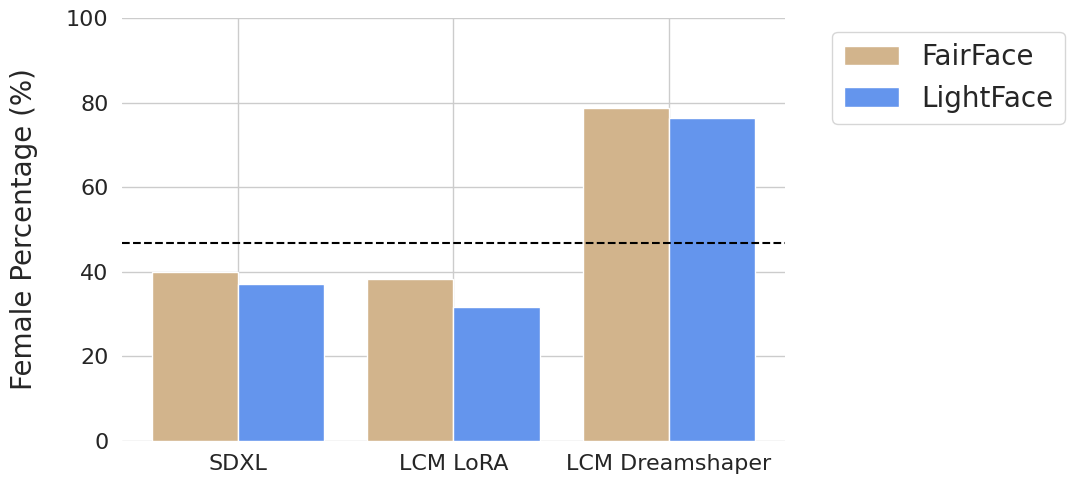

In [ ]:
sns.set(style="whitegrid")

models = ['SDXL', 'LCM LoRA', 'LCM Dreamshaper']
evaluators = df['evaluator_name'].unique()
evaluator_colors = {'FairFace': 'tan', 'LightFace': 'cornflowerblue'}
line_color = 'black'

# BLS reference value for gender
bls_reference_gender = 46.9


fig, ax = plt.subplots(figsize=(11, 5))


num_models = len(models)
num_evaluators = len(evaluators)
total_width = 0.8
bar_width = total_width / num_evaluators
index = np.arange(num_models)

for j, evaluator in enumerate(evaluators):
    percentages = []
    for i, model in enumerate(models):
        base_model_df = df[df['evaluation_name'].str.startswith(model)]
        evaluator_model_df = base_model_df[(base_model_df['evaluator_name'] == evaluator) & (base_model_df['classifier_name'] == 'gender')]
        total_count = len(evaluator_model_df)
        female_count = len(evaluator_model_df[evaluator_model_df['final_label'] == 'Female'])
        female_percentage = (female_count / total_count) * 100 if total_count > 0 else 0
        percentages.append(female_percentage)

    ax.bar(index + j * bar_width, percentages, bar_width, label=evaluator, color=evaluator_colors[evaluator], alpha=1)

ax.axhline(bls_reference_gender, color=line_color, linestyle='dashed', linewidth=1.5)

ax.set_xticks(index + total_width / 2 - bar_width / 2)
ax.set_xticklabels(models)
ax.tick_params(axis='both', labelsize=16)
ax.set_ylim(0, 100)
ax.set_ylabel('Female Percentage (%)', fontsize=20, labelpad=20)
ax.set_xlabel('', fontsize=20, labelpad=30)
ax.legend(fontsize=20, bbox_to_anchor=(1.05, 1))

ax.set_title('')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig(f"gender_dist.png", bbox_inches='tight')
plt.show()

# Race per Subcategory

In [ ]:
from matplotlib.patches import Rectangle

highlighted_subcategories = ['social worker', 'taxi driver', 'postal worker', "security guard", 'printing press operator'] #'postal worker', 'printing press operator

bar_width= 0.8

def highlight_subcategories(ax, labels, highlighted, color='darkred'):
    for label in highlighted:
        if label in labels:
            index = labels.index(label)
            height = 100
            rect = Rectangle((index * 1.1 - bar_width / 2, 0), bar_width, height, fill=False, edgecolor=color, linewidth=1)
            ax.add_patch(rect)

            ax.get_xticklabels()[index].set_color(color)
            ax.get_xticklabels()[index].set_fontweight('bold')

In [ ]:
sns.set(style="whitegrid")

models = ['SDXL', 'LCM LoRA', 'LCM Dreamshaper']
evaluators = df['evaluator_name'].unique()
races = ['White', 'Asian', 'Latino Hispanic', 'Middle Eastern', 'Black', 'Indian']
race_colors = {
    'White': 'cornflowerblue', 'Asian': 'seagreen', 'Latino Hispanic': 'salmon',
    'Middle Eastern': 'goldenrod', 'Black': 'gray', 'Indian': 'mediumpurple'
}

for model in models:
    for evaluator in evaluators:

        model_eval_df = df[(df['evaluation_name'].str.startswith(model)) & (df['evaluator_name'] == evaluator)]


        subcategory_distribution = model_eval_df.groupby(['subcategory_name', 'final_label']).size().unstack(fill_value=0)
        subcategory_distribution = subcategory_distribution[races]
        subcategory_distribution = subcategory_distribution.div(subcategory_distribution.sum(axis=1), axis=0) * 100


        subcategory_sorted = subcategory_distribution.sort_values(by='White', ascending=False)


        plt.figure(figsize=(21, 9))


        x_positions = np.arange(len(subcategory_sorted)) * 1.1
        bottom = np.zeros(len(subcategory_sorted))
        for race in races:
            plt.bar(x_positions, subcategory_sorted[race], bottom=bottom, width=bar_width, label=race, color=race_colors[race])
            bottom += subcategory_sorted[race].values


        plt.title(f'{model} - {evaluator}', fontsize=16, pad=20)
        plt.xticks(x_positions, subcategory_sorted.index, rotation=90, fontsize=12)
        plt.ylabel('Percentage (%)', fontsize=16)
        plt.xlabel('', fontsize=12)
        plt.ylim(0, 100)
        plt.xlim(-.8, (len(subcategory_sorted.index)*1.1)+.1)


        highlight_subcategories(plt.gca(), list(subcategory_sorted.index), highlighted_subcategories, color='darkred')

        plt.legend(title='Race group', loc='lower left', fontsize=16)


        plt.tight_layout()
        plt.savefig(f"race_detailed_{evaluator}_{model.replace(' ', '_')}.eps", bbox_inches='tight')
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Gender BLS Difference 20 Tops

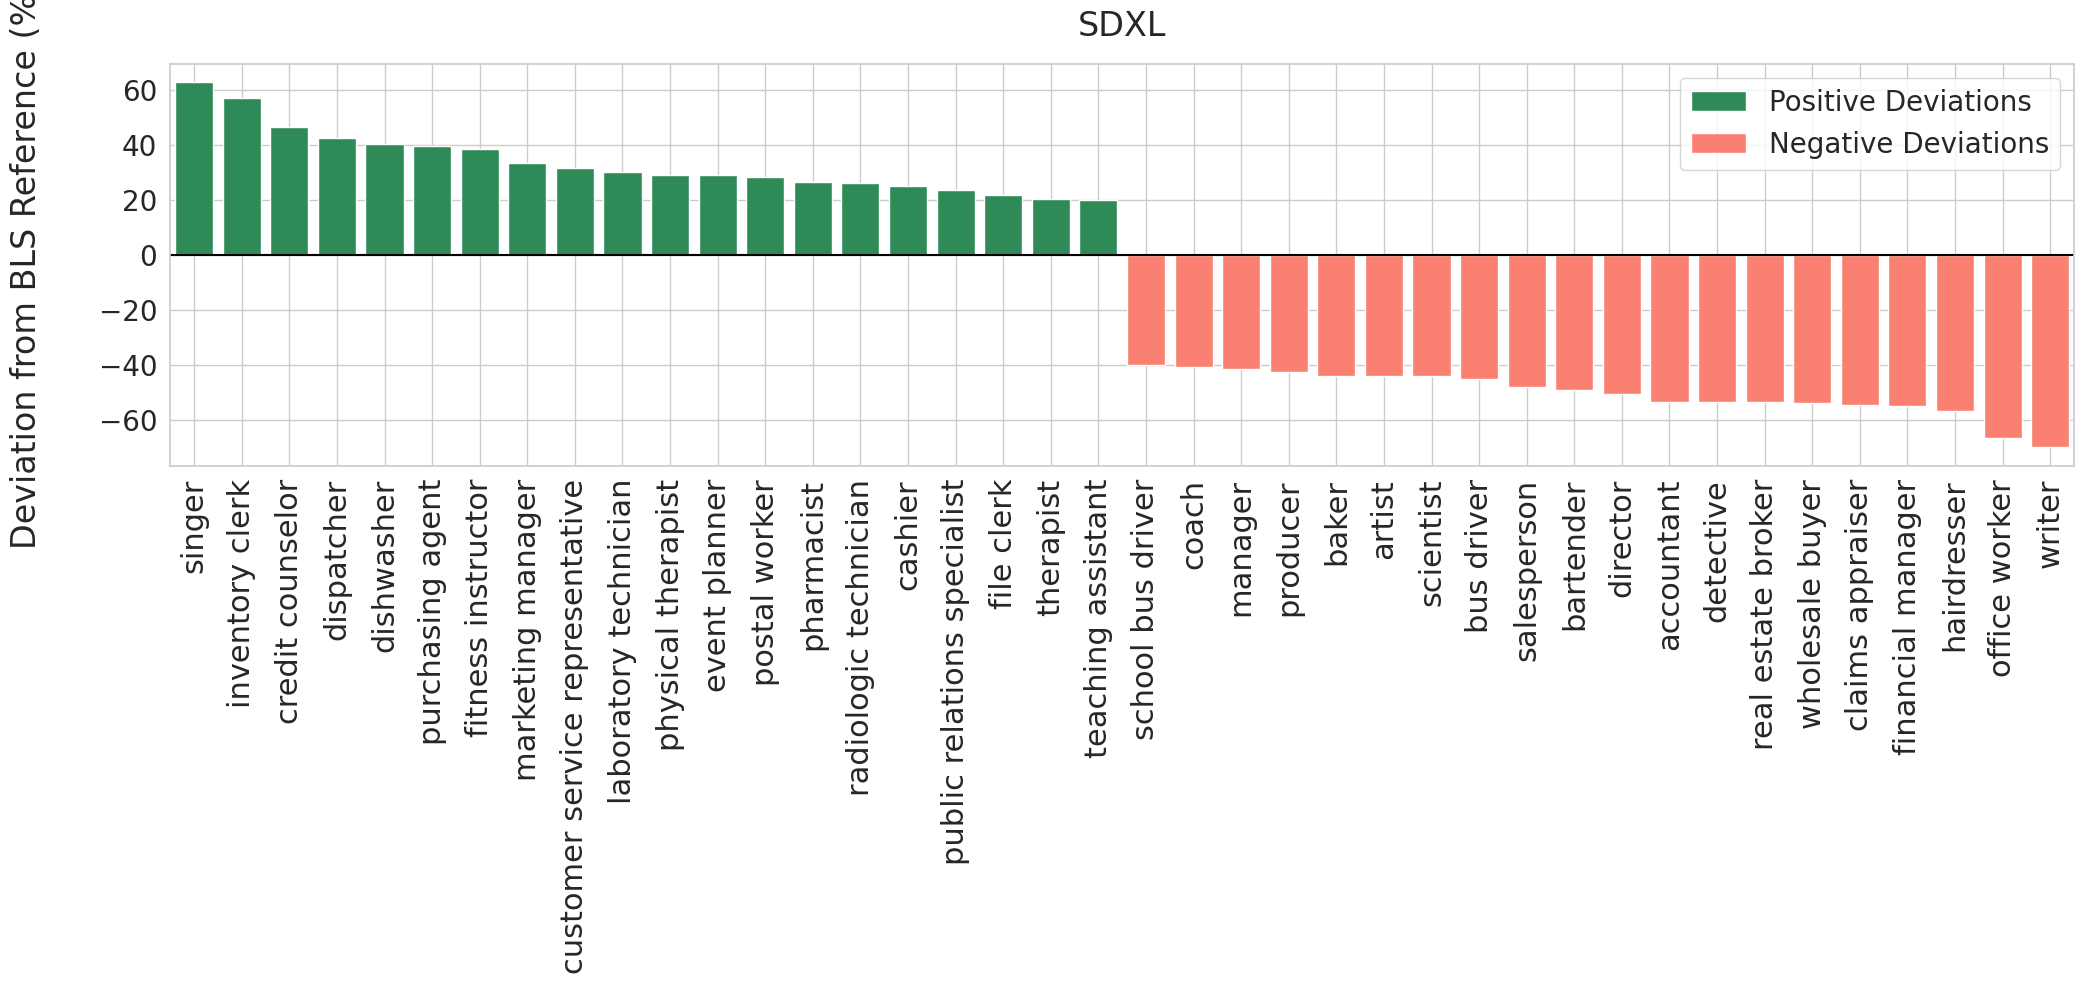

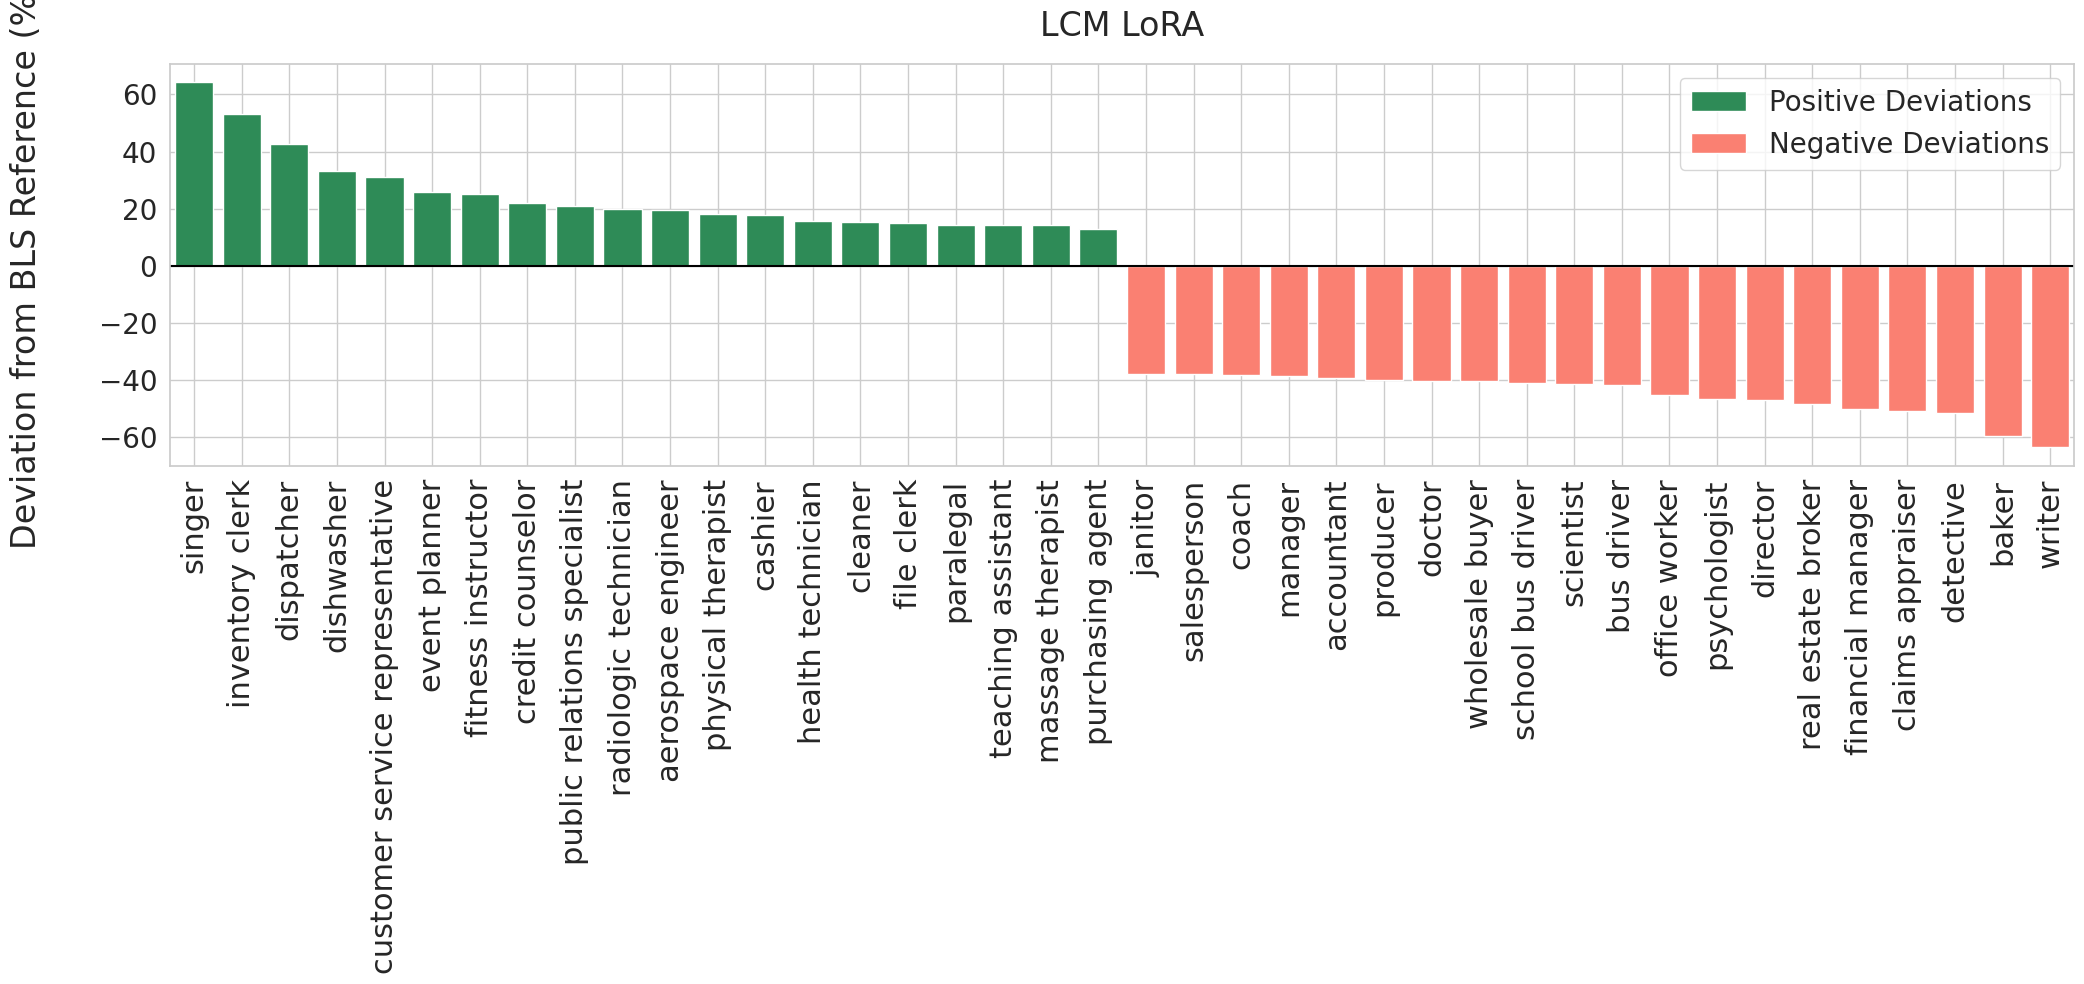

In [ ]:
models = ['SDXL', 'LCM LoRA']
evaluator = 'FairFace'

for model in models:
    deviations = []

    for subcategory, bls_data in bls_json.items():
        relevant_rows = df[(df['evaluation_name'].str.startswith(model)) &
                            (df['evaluator_name'] == evaluator) &
                            (df['classifier_name'] == 'gender') &
                            (df['subcategory_name'] == subcategory)]

        if not relevant_rows.empty:
            female_count = relevant_rows['final_label'].value_counts().get('Female', 0)
            total_count = len(relevant_rows)
            female_percentage = (female_count / total_count) * 100 if total_count > 0 else 0
            deviation = female_percentage - bls_data['percentage_female']
            deviations.append((subcategory, deviation))

    deviations.sort(key=lambda x: x[1], reverse=True)
    top_20 = deviations[:20] if len(deviations) > 20 else deviations
    bottom_20 = deviations[-20:] if len(deviations) > 20 else deviations

    if top_20 and bottom_20:
        plt.figure(figsize=(21, 10))

        if top_20:
            top_subcategories, top_deviations = zip(*top_20)
            plt.bar(top_subcategories, top_deviations, color='seagreen', label='Positive Deviations')
        if bottom_20:
            bottom_subcategories, bottom_deviations = zip(*bottom_20)
            plt.bar(bottom_subcategories, bottom_deviations, color='salmon', label='Negative Deviations')

        plt.title(f'{model}', fontsize=24, pad=20)
        plt.xlim(-0.5, 40 - 0.5)
        plt.xticks(rotation=90, ha='center', fontsize=22)
        plt.yticks(fontsize=20)
        plt.ylabel('Deviation from BLS Reference (%)', fontsize=24, labelpad=40)
        plt.axhline(0, color='black', linewidth=1.5)
        plt.legend(fontsize=20)

        plt.tight_layout()
        plt.savefig(f'{model}_top_20_gender.eps', format='eps')
        plt.show()
    else:
        print(f"No data available for model {model} and evaluator {evaluator}.")


# Female Quintiles


In [ ]:
models = ['SDXL', 'LCM LoRA', 'LCM Dreamshaper']
evaluators = ['FairFace', 'LightFace']

quintiles = [(0, 20), (20, 40), (40, 60), (60, 80), (80, 100)]
quintile_labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']

sd_v1_5_values = [6.38, 9.23, 25.38, 53.33, 85.64]
sd_v2_1_values = [4.36, 11.79, 15.9, 38.46, 71.28]

bls_quintile_avgs = []
model_evaluator_avgs = {(model, evaluator): [] for model in models for evaluator in evaluators}

gender_df = df[df['classifier_name'] == 'gender']

for lower, upper in quintiles:
    quintile_occupations = [occ for occ, data in bls_json.items() if lower < data['percentage_female'] <= upper]
    bls_avg = np.mean([data['percentage_female'] for occ, data in bls_json.items() if occ in quintile_occupations])
    bls_quintile_avgs.append(bls_avg)

    for model in models:
        for evaluator in evaluators:
            percentages = []
            for occupation, data in bls_json.items():
                if occupation in quintile_occupations:
                    occupation_data = gender_df[(gender_df['evaluation_name'].str.startswith(model)) &
                                         (gender_df['evaluator_name'] == evaluator) &
                                         (gender_df['subcategory_name'] == occupation)]
                    if not occupation_data.empty:
                        female_count = occupation_data['final_label'].value_counts().get('Female', 0)
                        total_count = len(occupation_data)
                        if total_count > 0:
                            percentages.append((female_count / total_count) * 100)
            avg_percentage = np.mean(percentages) if percentages else np.nan
            model_evaluator_avgs[(model, evaluator)].append(avg_percentage)


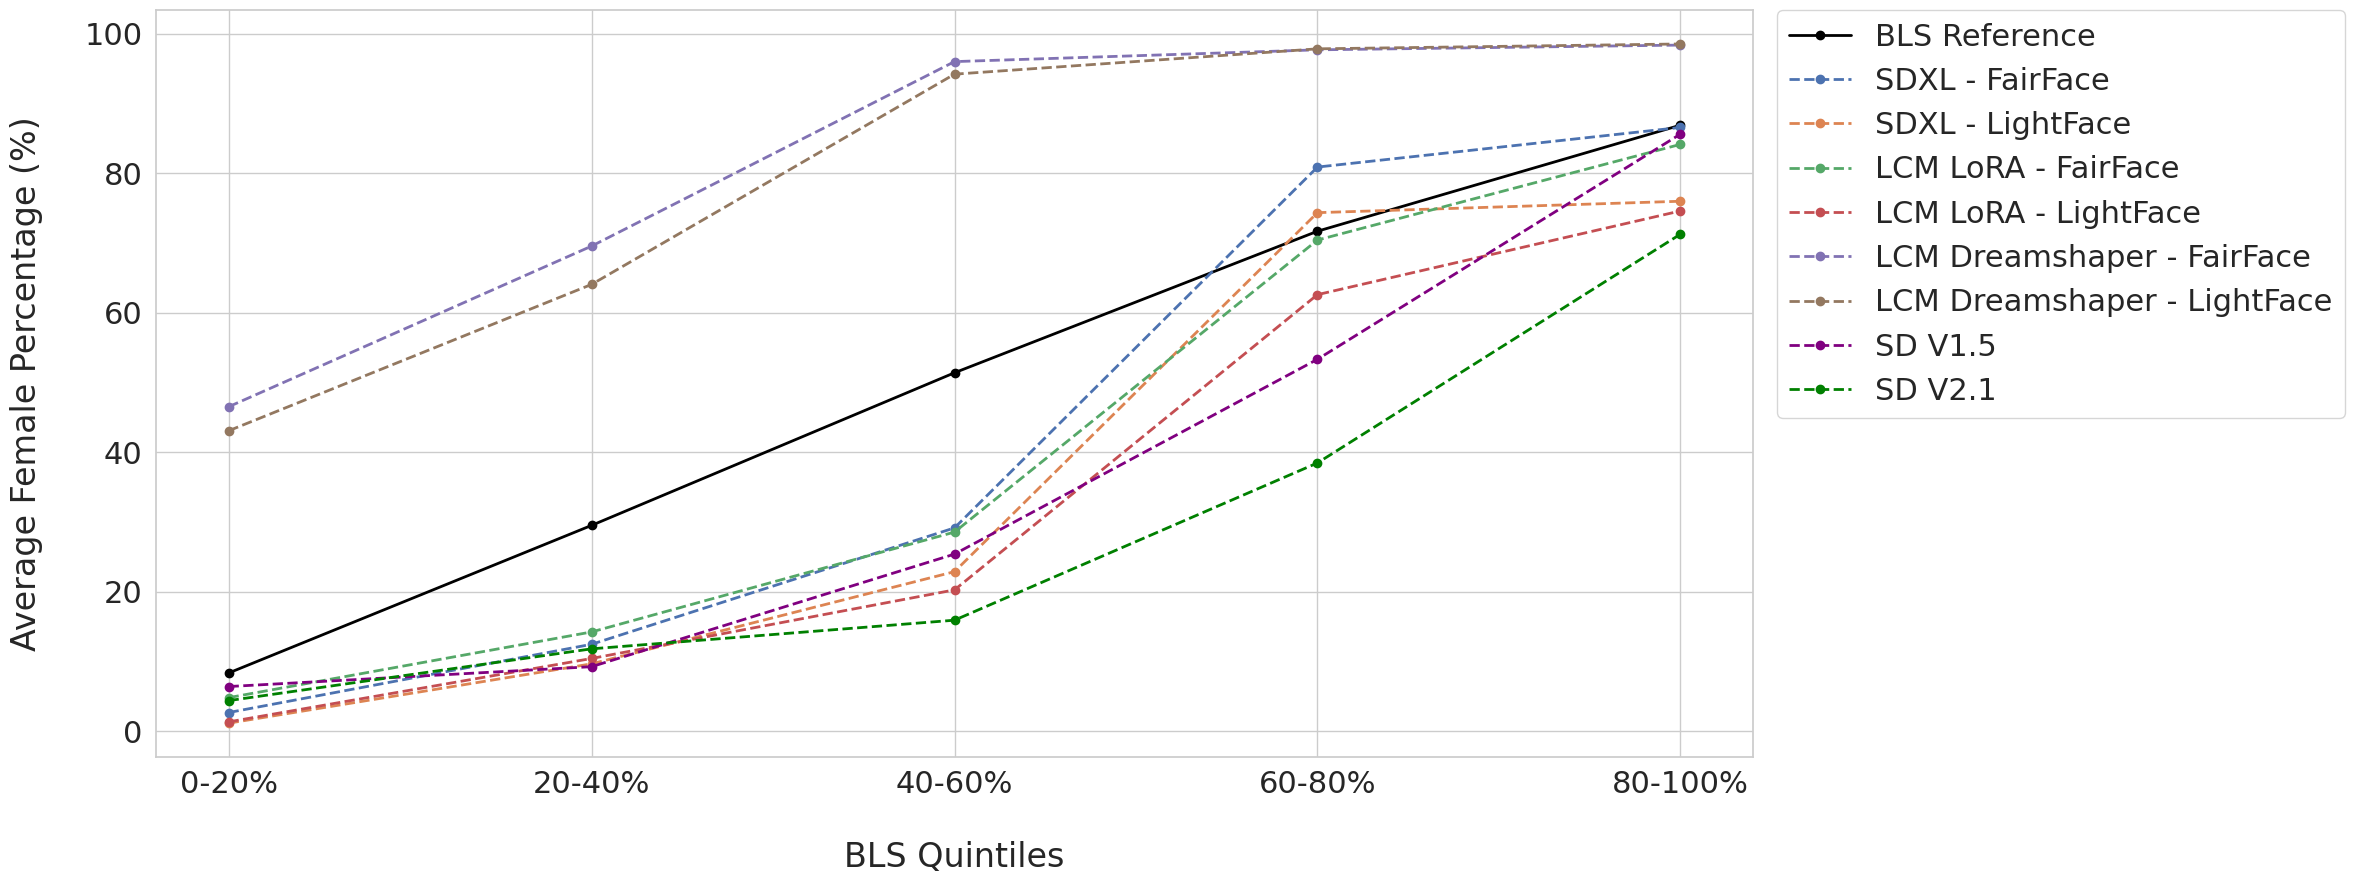

In [ ]:
plt.figure(figsize=(25, 9))
sns.set(style="whitegrid")
plt.plot(quintile_labels, bls_quintile_avgs, label='BLS Reference', marker='o', linestyle='-', linewidth=2, color='black')
for (model, evaluator), avgs in model_evaluator_avgs.items():
    plt.plot(quintile_labels, avgs, label=f'{model} - {evaluator}', marker='o', linestyle='--', linewidth=2)

plt.plot(quintile_labels, sd_v1_5_values, label='SD V1.5', marker='o', linestyle='--', linewidth=2, color='purple')
plt.plot(quintile_labels, sd_v2_1_values, label='SD V2.1', marker='o', linestyle='--', linewidth=2, color='green')

plt.tick_params(labelsize=22)
plt.title('', fontsize=24, pad=30)
plt.xlabel('BLS Quintiles', fontsize=24, labelpad=30)
plt.ylabel('Average Female Percentage (%)', fontsize=24, labelpad=30)
plt.legend(loc='upper right', bbox_to_anchor=(1.38, 1.02), fontsize=22)
plt.tight_layout()
plt.savefig(f"quantiles_plot.png", bbox_inches='tight')
plt.show()

# 80-20 Woman-race analysis

<ipython-input-71-dc4fd88f7787>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(subcategory_sorted.index, rotation=90)
<ipython-input-71-dc4fd88f7787>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(subcategory_sorted.index, rotation=90)


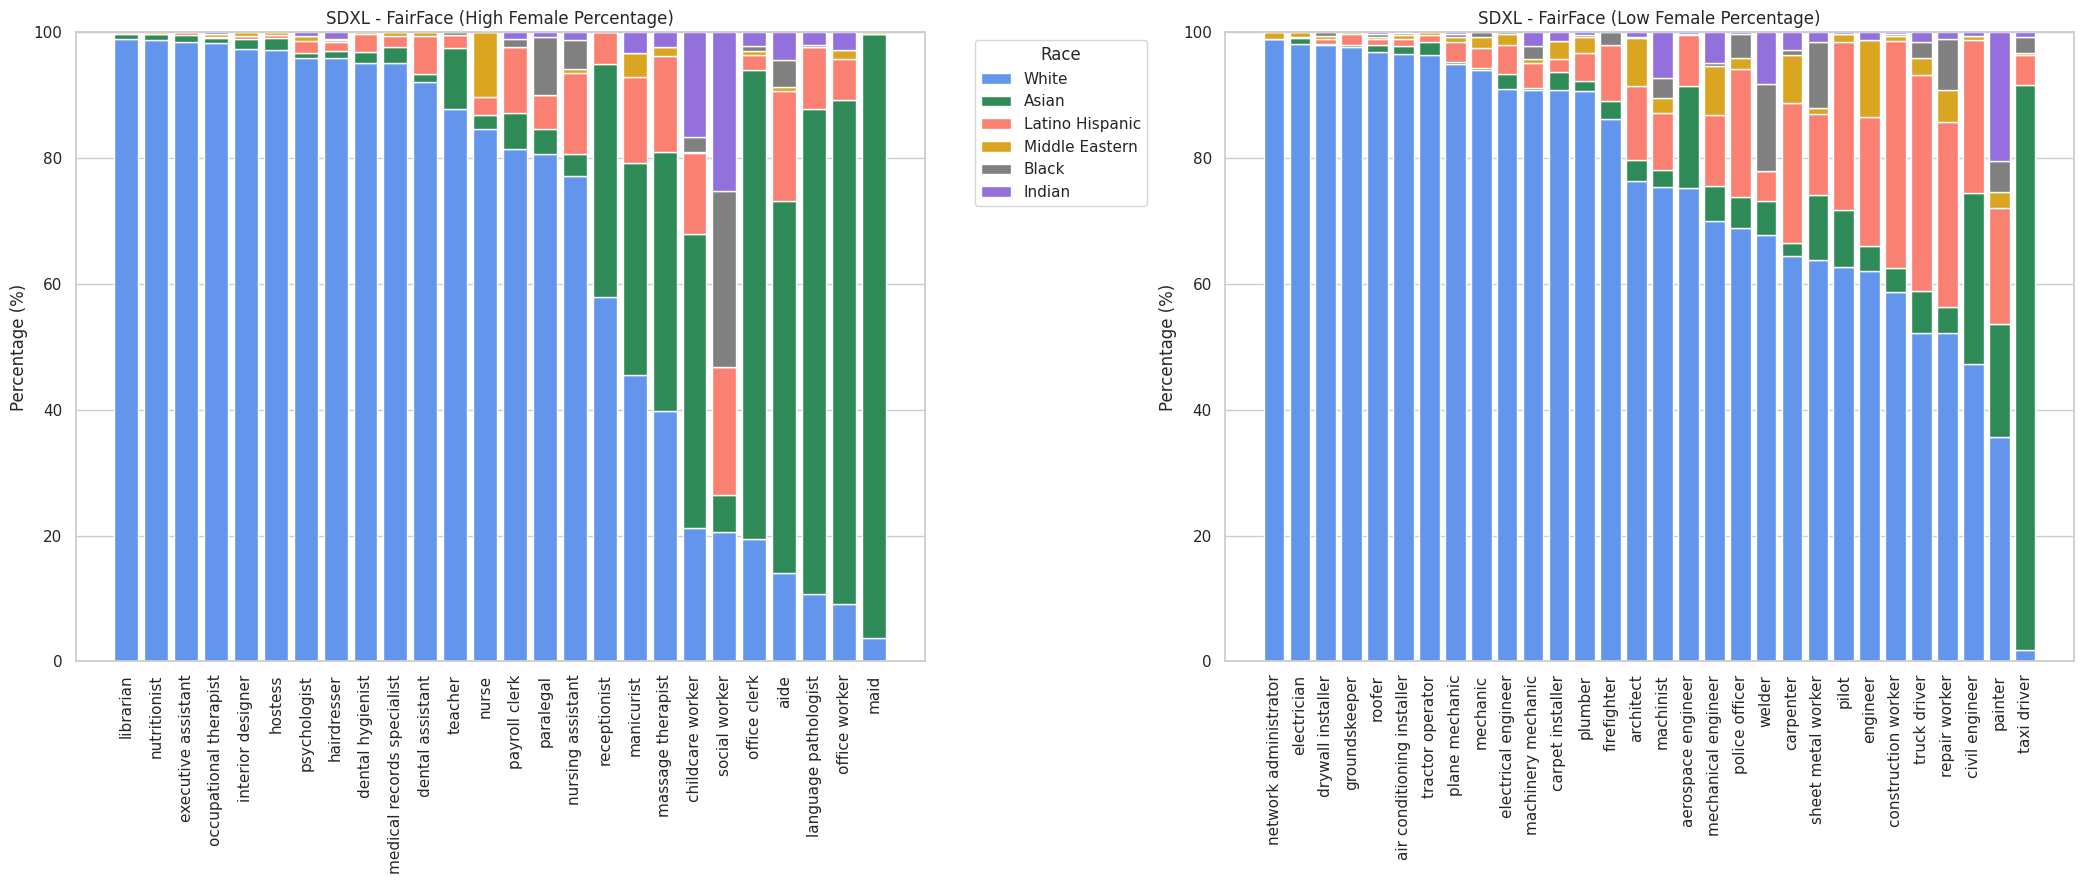

<ipython-input-71-dc4fd88f7787>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(subcategory_sorted.index, rotation=90)
<ipython-input-71-dc4fd88f7787>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(subcategory_sorted.index, rotation=90)


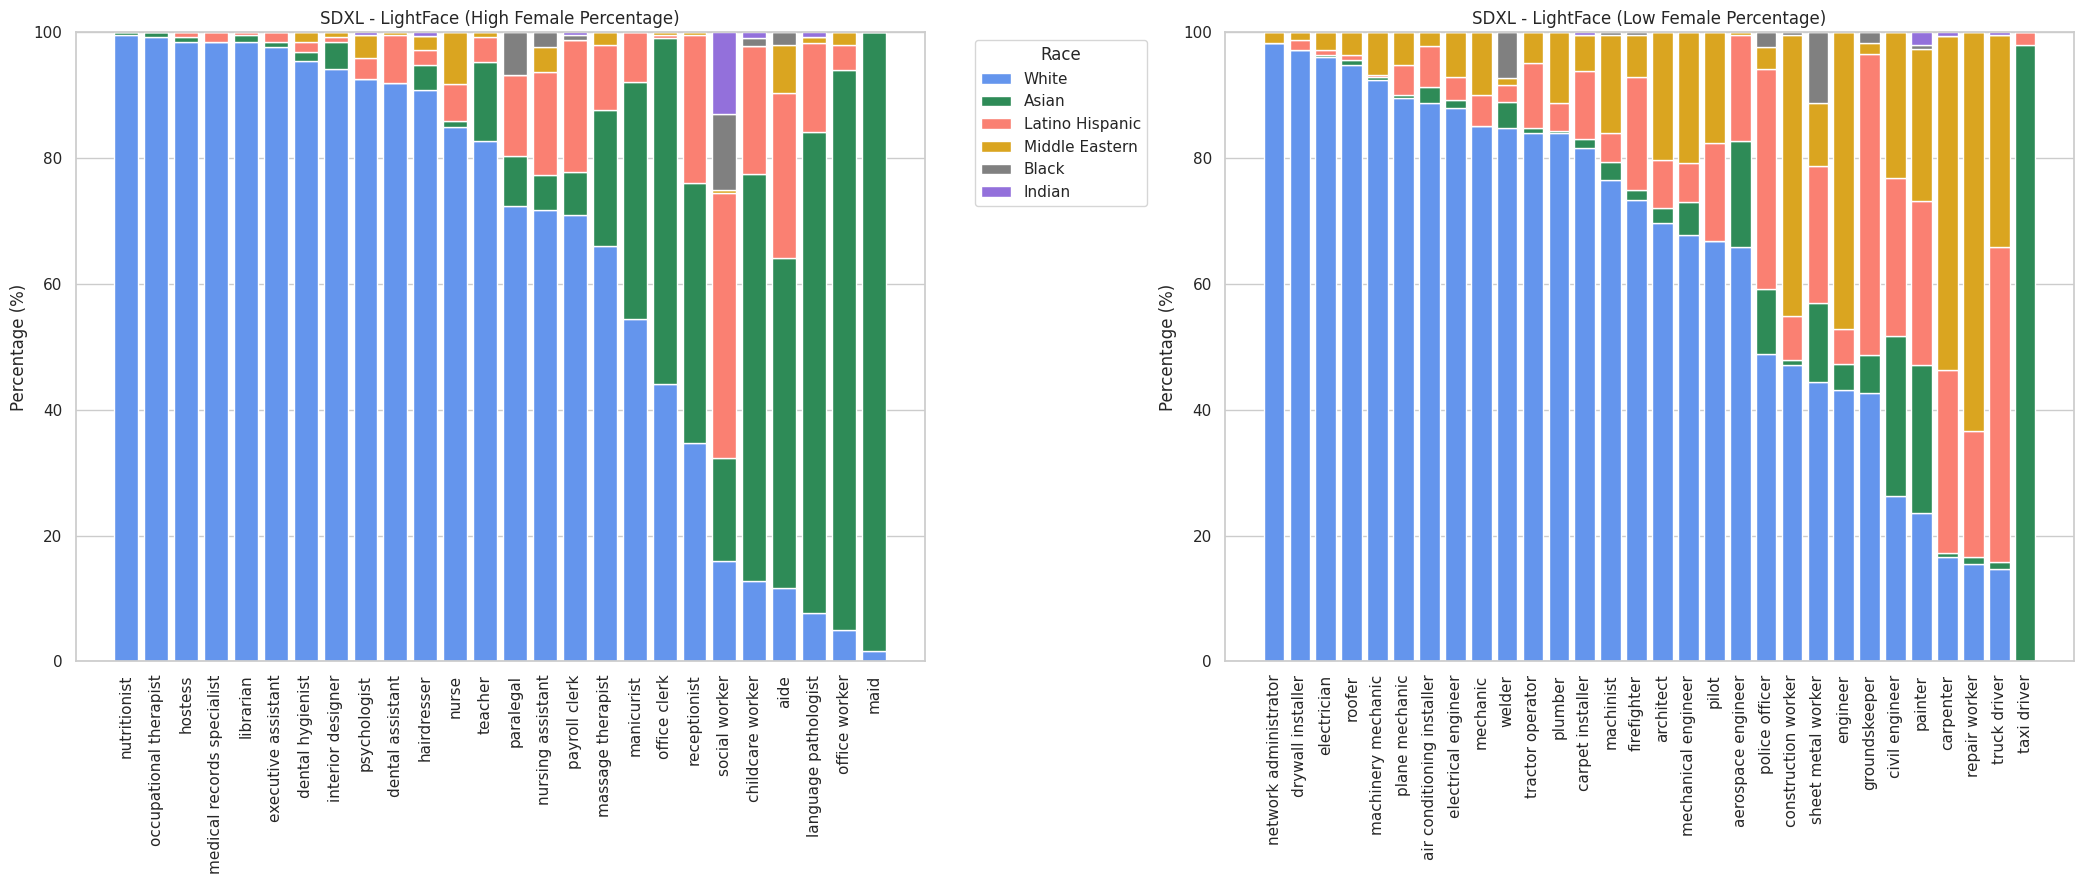

<ipython-input-71-dc4fd88f7787>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(subcategory_sorted.index, rotation=90)
<ipython-input-71-dc4fd88f7787>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(subcategory_sorted.index, rotation=90)


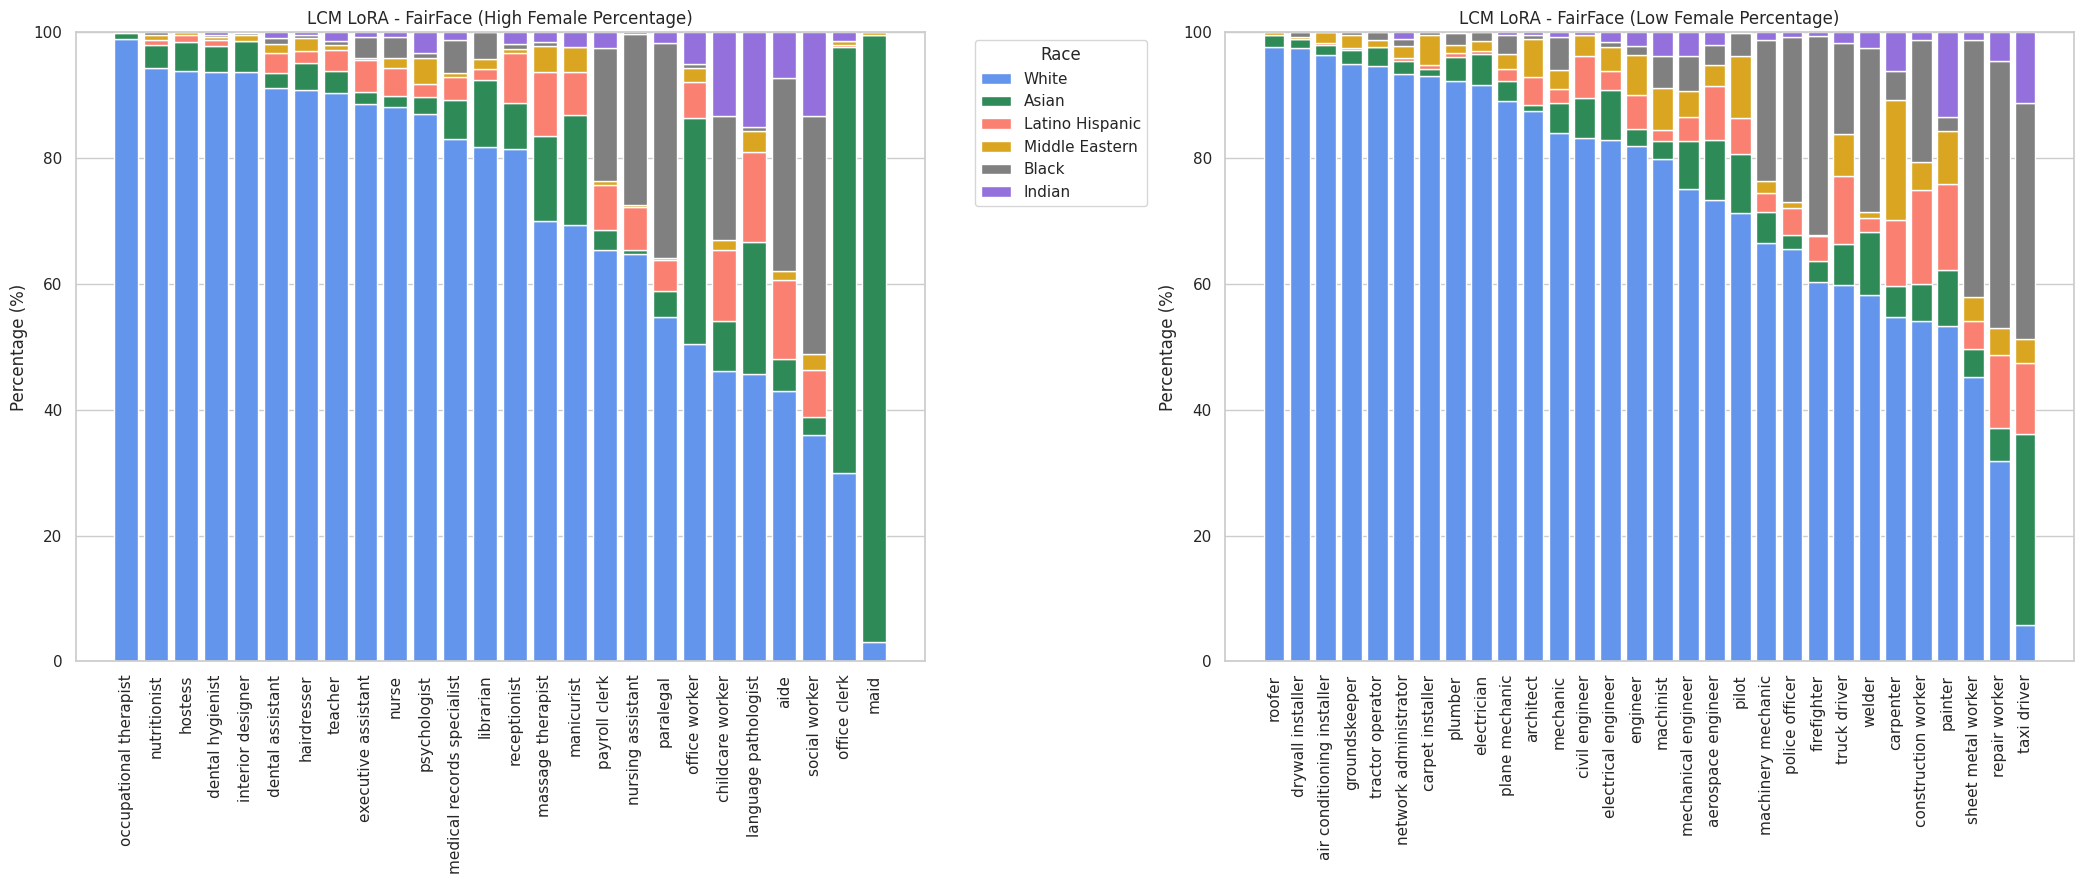

<ipython-input-71-dc4fd88f7787>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(subcategory_sorted.index, rotation=90)
<ipython-input-71-dc4fd88f7787>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(subcategory_sorted.index, rotation=90)


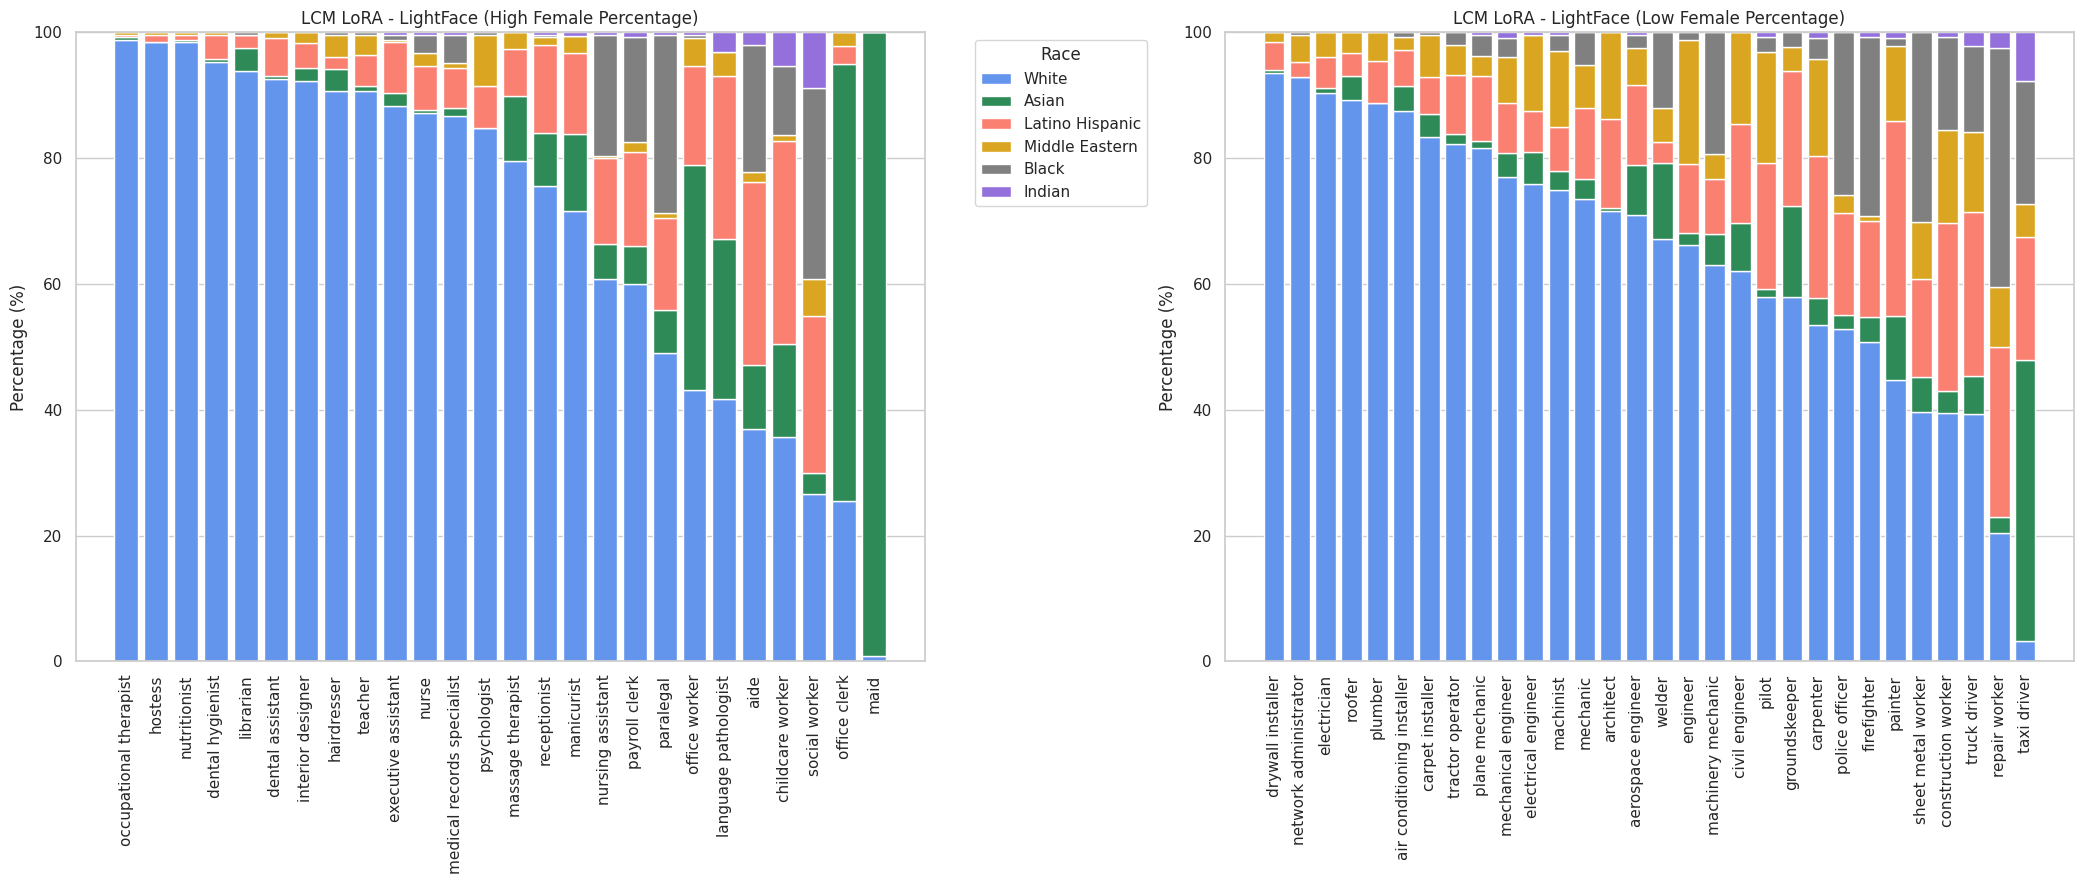

<ipython-input-71-dc4fd88f7787>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(subcategory_sorted.index, rotation=90)
<ipython-input-71-dc4fd88f7787>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(subcategory_sorted.index, rotation=90)


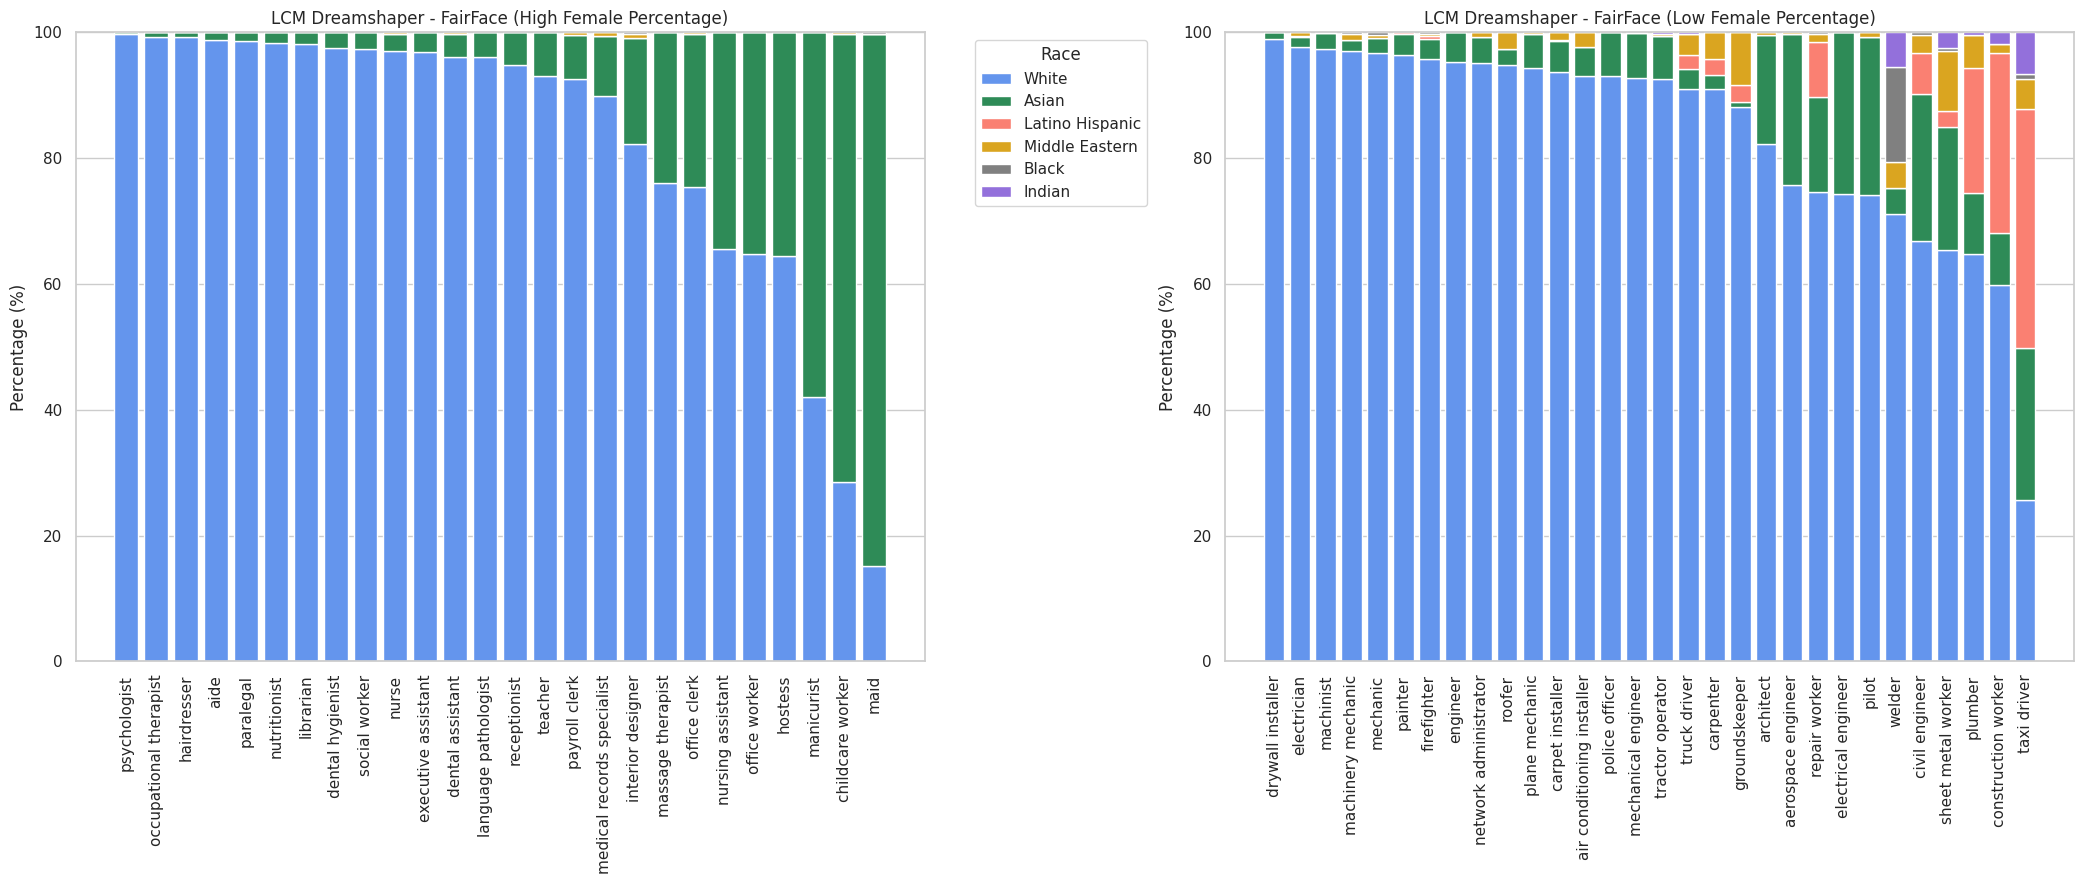

<ipython-input-71-dc4fd88f7787>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(subcategory_sorted.index, rotation=90)
<ipython-input-71-dc4fd88f7787>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(subcategory_sorted.index, rotation=90)


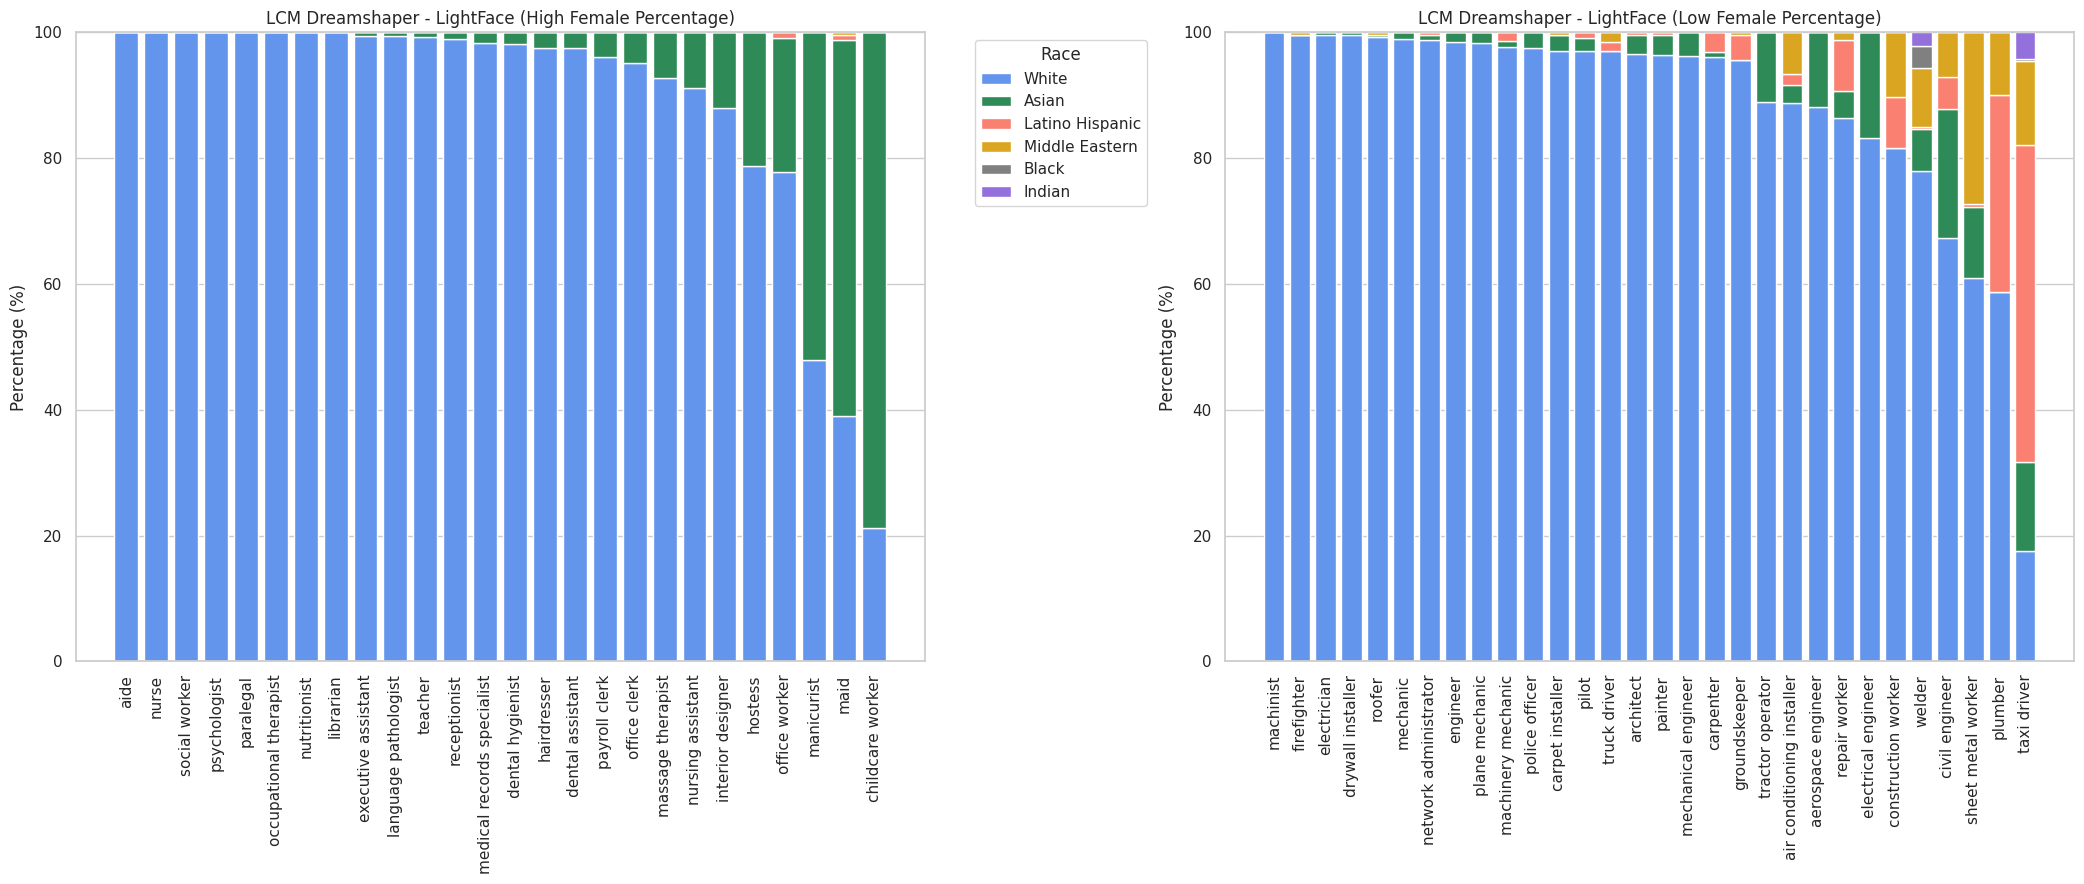

In [ ]:
models = ['SDXL', 'LCM LoRA', 'LCM Dreamshaper']
evaluators = df['evaluator_name'].unique().tolist()
races = ['White', 'Asian', 'Latino Hispanic', 'Middle Eastern', 'Black', 'Indian']
race_colors = {
    'White': 'cornflowerblue', 'Asian': 'seagreen', 'Latino Hispanic': 'salmon',
    'Middle Eastern': 'goldenrod', 'Black': 'gray', 'Indian': 'mediumpurple'
}

high_female_occupations = [occ for occ, data in bls_json.items() if data['percentage_female'] >= 80]
low_female_occupations = [occ for occ, data in bls_json.items() if data['percentage_female'] <= 20]

for model in models:
    for evaluator in evaluators:
        fig, axes = plt.subplots(1, 2, figsize=(21, 9))
        for index, (occupation_group, title) in enumerate([(high_female_occupations, 'High Female Percentage'),
                                                           (low_female_occupations, 'Low Female Percentage')]):

            model_eval_df = df[(df['evaluation_name'].str.startswith(model)) &
                               (df['evaluator_name'] == evaluator) &
                               (df['subcategory_name'].isin(occupation_group))]


            subcategory_distribution = model_eval_df.groupby(['subcategory_name', 'final_label']).size().unstack(fill_value=0)
            for race in races:
                if race not in subcategory_distribution.columns:
                    subcategory_distribution[race] = 0
            subcategory_distribution = subcategory_distribution[races]
            subcategory_distribution = subcategory_distribution.div(subcategory_distribution.sum(axis=1), axis=0) * 100

            subcategory_sorted = subcategory_distribution.sort_values(by='White', ascending=False)

            ax = axes[index]
            bottom = np.zeros(len(subcategory_sorted))
            for race in races:
                ax.bar(subcategory_sorted.index, subcategory_sorted[race], bottom=bottom, width=0.8, label=race, color=race_colors[race])
                bottom += subcategory_sorted[race].values

            ax.set_title(f'{model} - {evaluator} ({title})')
            ax.set_xticklabels(subcategory_sorted.index, rotation=90)
            ax.set_ylabel('Percentage (%)')
            ax.set_ylim(0, 100)
            if index == 0:
                ax.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')

        plt.tight_layout()
        plt.savefig(f'{model}_{evaluator}_race_distribution.eps', format='eps')
        plt.show()


# 90 and 10% female occupations counts

In [ ]:
def count_extreme_female_occupations(df, models, evaluators, threshold_high=90, threshold_low=10):
    extreme_occupations_counts = {model: {'High': 0, 'Low': 0} for model in models}

    for model in models:
        model_occupations = {evaluator: {'High': set(), 'Low': set()} for evaluator in evaluators}

        for evaluator in evaluators:
            model_eval_df = df[(df['evaluation_name'].str.startswith(model)) &
                               (df['evaluator_name'] == evaluator) &
                               (df['classifier_name'] == 'gender')]

            subcategory_female_percentage = model_eval_df.groupby('subcategory_name')['final_label'].apply(
                lambda x: (x == 'Female').mean() * 100)

            high_female_occupations = subcategory_female_percentage[subcategory_female_percentage >= threshold_high].index
            low_female_occupations = subcategory_female_percentage[subcategory_female_percentage <= threshold_low].index

            model_occupations[evaluator]['High'] = set(high_female_occupations)
            model_occupations[evaluator]['Low'] = set(low_female_occupations)

        high_intersection = set.intersection(*[sets['High'] for sets in model_occupations.values()])
        low_intersection = set.intersection(*[sets['Low'] for sets in model_occupations.values()])

        extreme_occupations_counts[model]['High'] = len(high_intersection)
        extreme_occupations_counts[model]['Low'] = len(low_intersection)

    for model, data in extreme_occupations_counts.items():
        print(f"Model: {model}")
        print("Number of Occupations with >= 90% Female Percentage for both evaluators:", data['High'])
        print("Number of Occupations with <= 10% Female Percentage for both evaluators:", data['Low'])
        print("\n")

count_extreme_female_occupations(df, ['SDXL', 'LCM LoRA', 'LCM Dreamshaper'], ['FairFace', 'DeepFace'])


Model: SDXL
Number of Occupations with >= 90% Female Percentage for both evaluators: 30
Number of Occupations with <= 10% Female Percentage for both evaluators: 71


Model: LCM LoRA
Number of Occupations with >= 90% Female Percentage for both evaluators: 17
Number of Occupations with <= 10% Female Percentage for both evaluators: 62


Model: LCM Dreamshaper
Number of Occupations with >= 90% Female Percentage for both evaluators: 101
Number of Occupations with <= 10% Female Percentage for both evaluators: 16




# Evaluator analysis

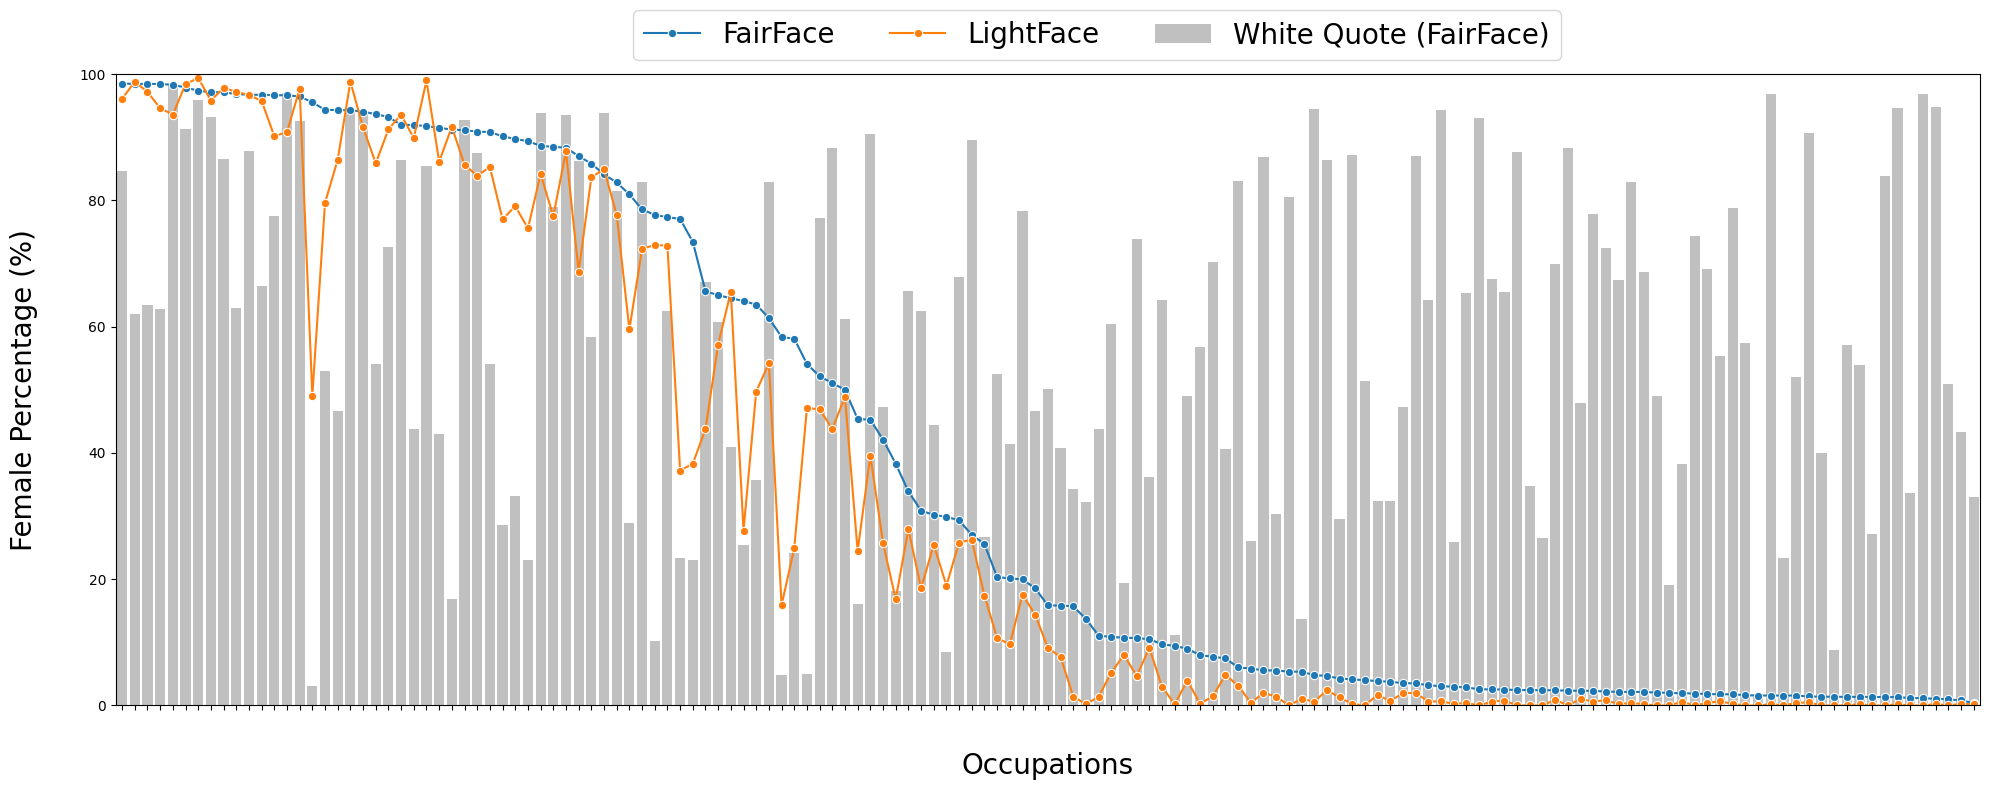

In [ ]:
models = ['SDXL', 'LCM LoRA']
df = df[df['evaluation_name'].apply(lambda x: any(x.startswith(model) for model in models))]


df['evaluator_name'] = df['evaluator_name'].replace({'DeepFace': 'LightFace'})


female_percentage = df[df['final_label'] == 'Female'].groupby(['subcategory_name', 'evaluator_name']).size() / df[df['classifier_name'] == 'gender'].groupby(['subcategory_name', 'evaluator_name']).size()
female_percentage = female_percentage.unstack()
female_percentage = female_percentage.fillna(0)



female_percentage_sorted = female_percentage.sort_values('FairFace', ascending=False)


asian_quote = df[(df['classifier_name'] == 'race') & (df['final_label'] == 'White') & (df['evaluator_name'] == 'FairFace')].groupby('subcategory_name').size() / df[(df['classifier_name'] == 'race') & (df['evaluator_name'] == 'FairFace')].groupby('subcategory_name').size()
asian_quote = asian_quote.reindex(female_percentage_sorted.index).fillna(0)

fig = plt.figure(figsize=(20, 8))
bars = plt.bar(female_percentage_sorted.index, asian_quote * 100, color='silver', alpha=1, label='White Quote (FairFace)')
for evaluator in ['FairFace', 'LightFace']:
    sns.lineplot(x=female_percentage_sorted.index, y=female_percentage_sorted[evaluator]*100, label=f'{evaluator}', marker='o')


plt.tick_params(labelbottom=False)


fig.subplots_adjust(bottom=.25, top=.4)
plt.ylabel('Female Percentage (%)', fontsize=20, labelpad=30)
plt.xlabel('Occupations', fontsize=20, labelpad=30)
plt.xlim(-0.5, len(female_percentage_sorted.index) - 0.5)
plt.ylim(0,100)
plt.legend(fontsize=20, bbox_to_anchor=(.27, 1), ncol=3)
plt.tight_layout()
plt.grid(False)
plt.savefig(f"ev_comp_female.eps", bbox_inches='tight')
plt.show()

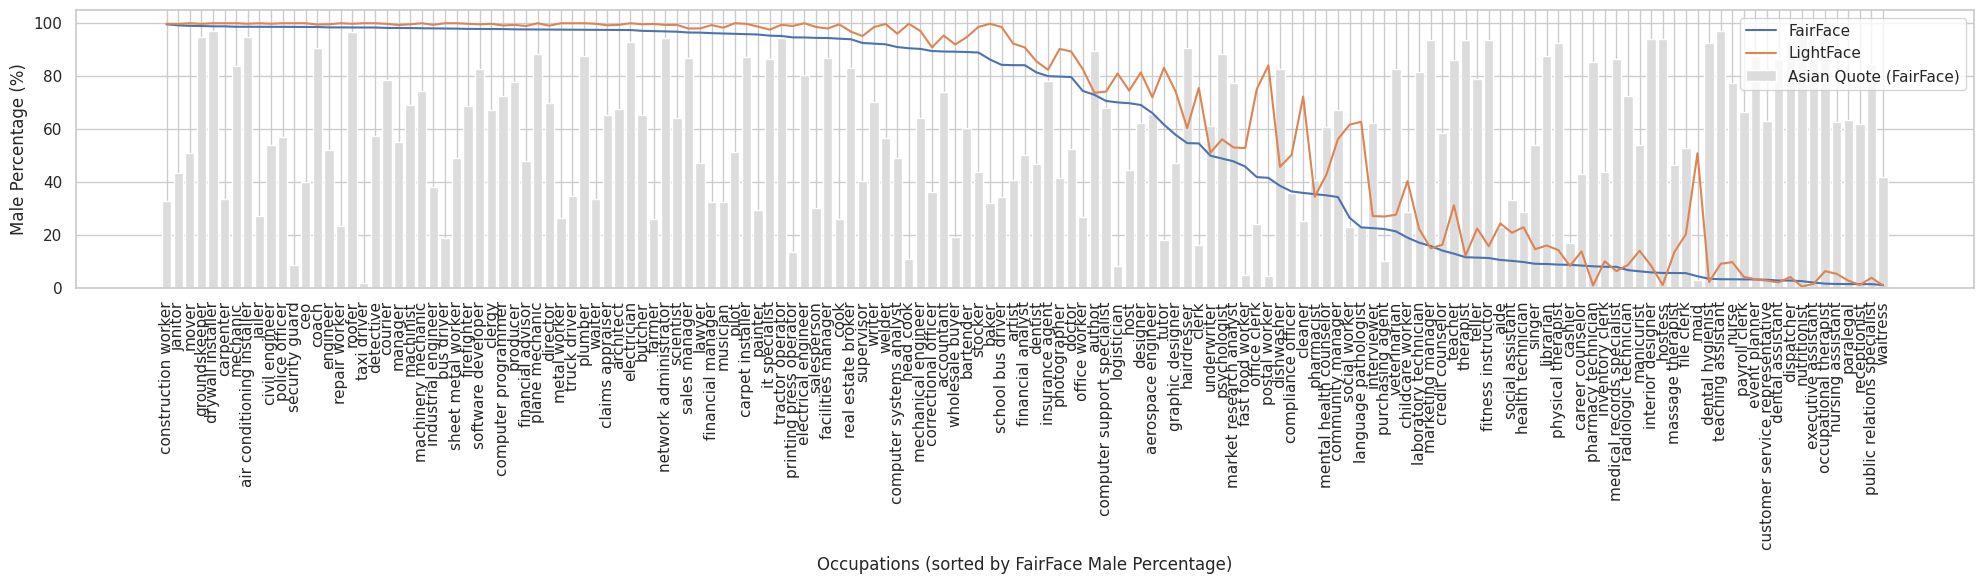

In [ ]:

models = ['SDXL', 'LCM LoRA']
models_df = df[df['evaluation_name'].apply(lambda x: any(x.startswith(model) for model in models))]


models_df['evaluator_name'] = models_df['evaluator_name'].replace({'DeepFace': 'LightFace'})


female_percentage = df[df['final_label'] == 'Male'].groupby(['subcategory_name', 'evaluator_name']).size() / models_df[models_df['classifier_name'] == 'gender'].groupby(['subcategory_name', 'evaluator_name']).size()
female_percentage = female_percentage.unstack()
female_percentage = female_percentage.fillna(0)



female_percentage_sorted = female_percentage.sort_values('FairFace', ascending=False)


asian_quote = models_df[(models_df['classifier_name'] == 'race') & (models_df['final_label'] == 'White') & (models_df['evaluator_name'] == 'FairFace')].groupby('subcategory_name').size() / models_df[(models_df['classifier_name'] == 'race') & (models_df['evaluator_name'] == 'FairFace')].groupby('subcategory_name').size()
asian_quote = asian_quote.reindex(female_percentage_sorted.index).fillna(0)


plt.figure(figsize=(20, 6))

plt.bar(female_percentage_sorted.index, asian_quote * 100, color='gainsboro', alpha=1, label='Asian Quote (FairFace)')

for evaluator in ['FairFace', 'LightFace']:
    sns.lineplot(x=female_percentage_sorted.index, y=female_percentage_sorted[evaluator]*100, label=f'{evaluator}')
plt.title('')
plt.xlabel('Occupations (sorted by FairFace Male Percentage)')
plt.ylabel('Male Percentage (%)')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig(f"ev_comp_male.eps", bbox_inches='tight')
plt.show()

# New

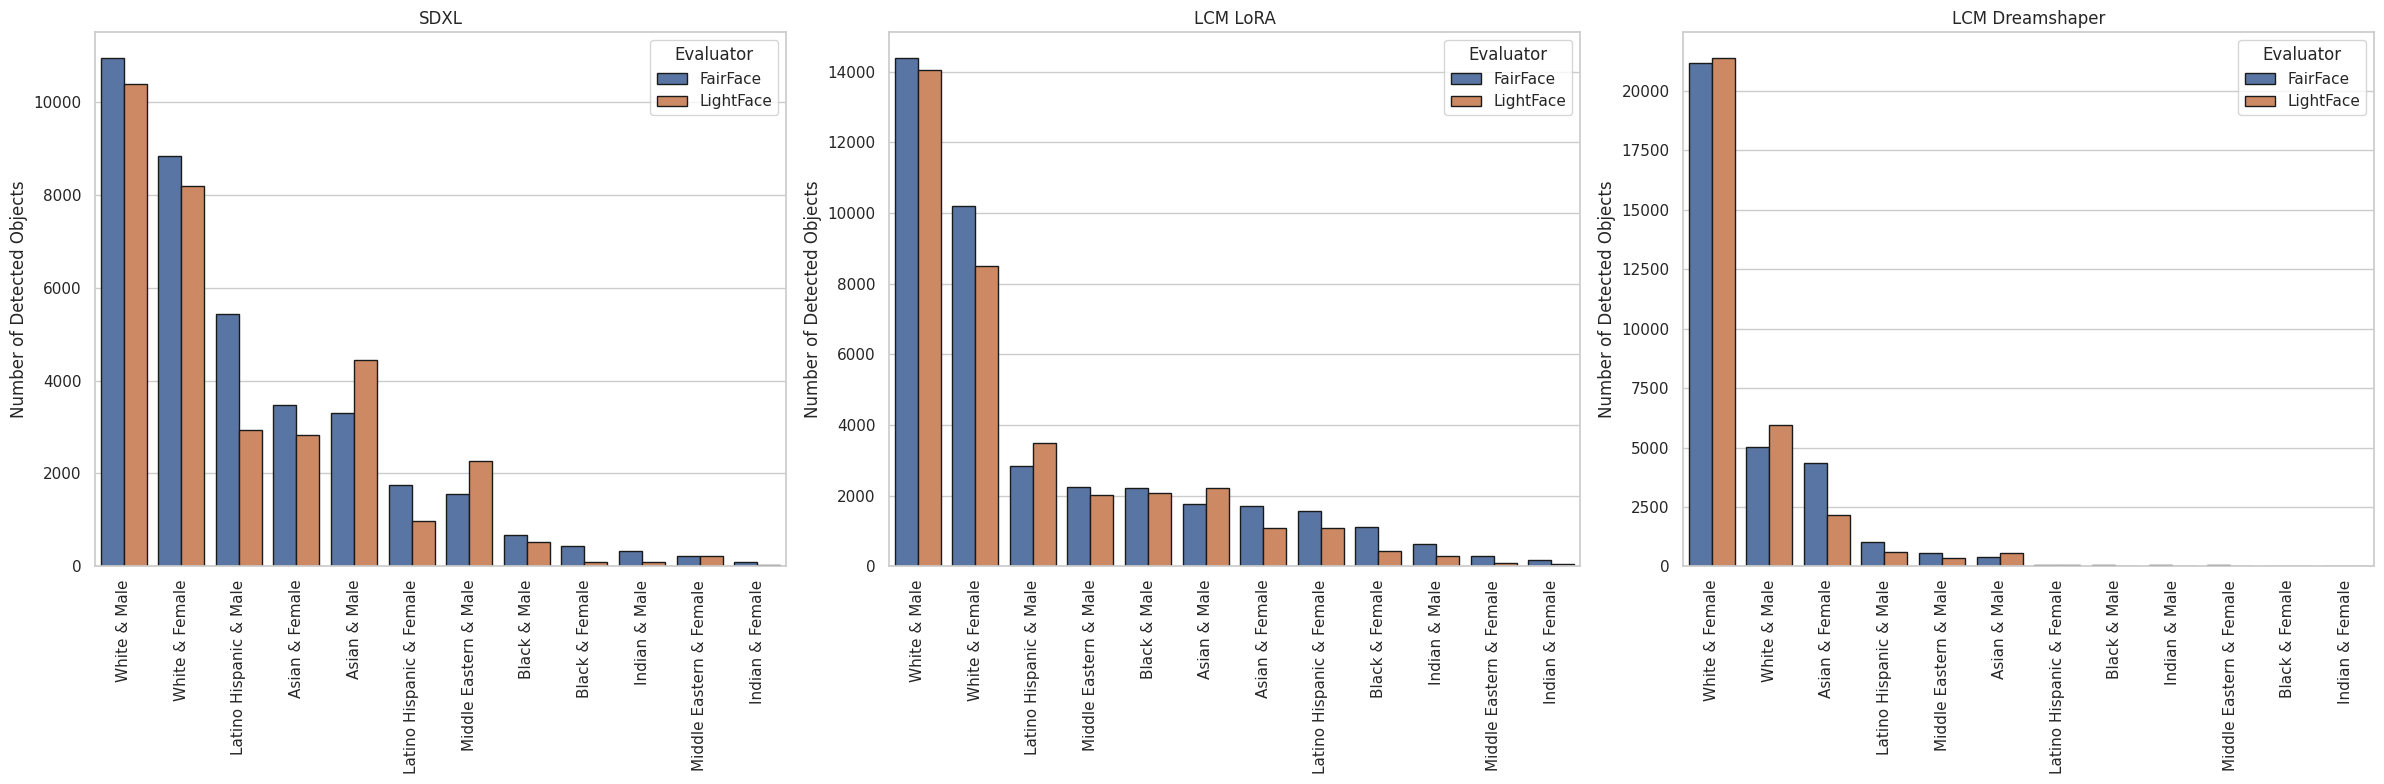

In [ ]:
models = ['SDXL', 'LCM LoRA', 'LCM Dreamshaper']
race_labels = ['White', 'Black', 'Asian', 'Latino Hispanic', 'Indian', 'Middle Eastern']
gender_labels = ['Female', 'Male']
evaluators = ['FairFace', 'LightFace']


fig, axes = plt.subplots(1, len(models), figsize=(24, 8))


for i, model in enumerate(models):
    combined_data = []
    model_df = df[df['evaluation_name'].str.startswith(model)]

    for evaluator in evaluators:
        evaluator_df = model_df[model_df['evaluator_name'] == evaluator]


        for race in race_labels:
            for gender in gender_labels:

                filtered_df = evaluator_df[(evaluator_df['classifier_name'].isin(['race', 'gender'])) &
                                ((evaluator_df['final_label'] == race) |
                                  (evaluator_df['final_label'] == gender))]


                pivoted_df = filtered_df.pivot_table(index='detected_object_id',
                                                    columns='classifier_name',
                                                    values='final_label',
                                                    aggfunc='first').reset_index()


                if 'race' in pivoted_df.columns and 'gender' in pivoted_df.columns:

                    count = pivoted_df[(pivoted_df['race'] == race) & (pivoted_df['gender'] == gender)].shape[0]
                else:

                    count = 0

                combined_data.append({'Evaluator': evaluator.replace('DeepFace', 'LightFace'), 'Combination': f'{race} & {gender}', 'Count': count})


    plot_data = pd.DataFrame(combined_data)


    plot_data = plot_data.sort_values(by=['Evaluator', 'Count'], ascending=[True, False])
    sns.barplot(x='Combination', y='Count', hue='Evaluator', data=plot_data, palette='deep', ax=axes[i], ec='k')
    axes[i].set_title(f'{model}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Number of Detected Objects')
    axes[i].tick_params(axis='x', labelrotation=90)
    axes[i].legend(title='Evaluator')

plt.tight_layout()
plt.show()
